In [1]:
#libaries Ill be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#NBA_API
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, shotchartdetail, teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, leaguedashteamstats, playerdashboardbyyearoveryear, playerdashboardbygeneralsplits, leaguedashplayerstats
from nba_api.stats.static import *


#functions used in this file
from ant_functions import *
pd.set_option('display.max_columns', None)

# Anthony Edwards - Player Analysis

## Player Information
- **Name**: Anthony Edwards
- **Position**: SG / SF  
- **Height**: 6'4"
- **Weight**: 225 lbs
- **College**: Georgia
- **Draft Year**: 2020 (1st overall pick)
- **Country**: United States

## Introduction
This notebook provides a detailed analysis of Anthony Edwards' performance throughout his NBA career, from his rookie season in 2020-21 to the present.

In [2]:
#player info and player ID
player_id = players.find_players_by_full_name('anthony edwards')[0]['id']
player_name = 'Anthony Edwards'
seasons = ['2020-21', '2021-22', '2022-23','2023-24','2024-25']
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]
player_info

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1630162,Anthony,Edwards,Anthony Edwards,"Edwards, Anthony",A. Edwards,anthony-edwards,2001-08-05T00:00:00,Georgia,USA,Georgia/USA,6-4,225,5,5,Guard,Active,N,1610612750,Timberwolves,MIN,timberwolves,Minnesota,anthony_edwards,2020,2025,N,Y,Y,2020,1,1,N


### Combining my datasets into one

In [3]:
season_mapping = {
    'S21': '2020-21',
    'S22': '2021-22', 
    'S23': '2022-23',
    'S24': '2023-24',
    'S25': '2024-25'
}

# Your avoid columns (including SEASON_ID as metadata)
avoidCols = ['Unnamed: 0', 'PLAYER_NAME', 'PLAYER_ID', 'MATCHUP', 'TEAM_ABBREVIATION', 'TEAM_ID', 'OPP_ABBREVIATION', 'HOME_GAME', 'GAME_ID', 'GAME_DATE', 'WL', 'COMMENT', 'START_POSITION',
             'IS_PLAYOFF','TEAM_SEASON_ID','TEAM_NAME','TEAM_GAME_DATE','TEAM_MATCHUP','TEAM_WL', 'OPP_TEAM_ID', 'whos_favored','spread','total','team_is_favored','team_spread','OPP_BLOWOUT_RISK', 'VIDEO_AVAILABLE', 'SEASON_ID']

# List to store all dataframes
all_seasons_data = []

# Load each season and add SEASON_ID
for season_code, season_id in season_mapping.items():
    df = pd.read_csv(f'REGULAR_DATA/{season_code}.csv')
    df['SEASON_ID'] = season_id
    all_seasons_data.append(df)
    print(f"Loaded {season_code} ({season_id}): {len(df)} games")

# Concatenate all seasons
combined_seasons = pd.concat(all_seasons_data, ignore_index=True)

# Create stat columns (excluding avoid columns)
stat_cols = [col for col in combined_seasons.columns if col not in avoidCols]

# Group by PLAYER_NAME and SEASON_ID, calculate mean for each stat
player_season_means = combined_seasons.groupby(['PLAYER_NAME', 'SEASON_ID'])[stat_cols].mean().round(2)

print("Available stat columns:")
print(stat_cols)
print(f"\nTotal players across all seasons: {len(player_season_means)}")

# Display the result
player_season_means.head(10)

Loaded S21 (2020-21): 23054 games
Loaded S22 (2021-22): 26039 games
Loaded S23 (2022-23): 25895 games
Loaded S24 (2023-24): 26401 games
Loaded S25 (2024-25): 26306 games
Available stat columns:
['PTS', 'AST', 'REB', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'STL', 'BLK', 'TOV', 'PLUS_MINUS', 'FANTASY_PTS', 'POINT_PER_SHOT', 'EFG', 'OFF_RATING', 'E_OFF_RATING', 'DEF_RATING', 'E_DEF_RATING', 'NET_RATING', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'AST_PCT', 'EFG_PCT', 'AST_TOV', 'USG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PIE', 'POSS', 'PACE_PER40', 'E_USG_PCT', 'MIN', 'SPD', 'DIST', 'ORBC', 'DRBC', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'CFGM', 'CFGA', 'CFG_PCT', 'UFGM', 'UFGA', 'UFG_PCT', 'DFGM', 'DFGA', 'DFG_PCT', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'BLKA', 'PF', 'PFD', 'TEAM_MIN', 'TEAM_FGM', 'TEAM_FGA', 'TEAM_FG_PCT', 'TEAM_FG3M', 'TEAM_FG3A', 'TEAM_FG3_

PTS   AST   REB   FGM   FGA  FG_PCT  FG3M  FG3A  \
PLAYER_NAME  SEASON_ID                                                      
A.J. Lawson  2022-23     3.73  0.13  1.40  1.47  2.93    0.47  0.67  1.67   
             2023-24     3.24  0.48  1.19  1.29  2.88    0.48  0.31  1.19   
             2024-25     9.08  1.19  3.31  3.08  7.31    0.43  1.27  3.88   
AJ Green     2022-23     4.40  0.63  1.29  1.51  3.57    0.34  1.26  3.00   
             2023-24     4.50  0.54  1.14  1.48  3.50    0.40  1.23  3.02   
             2024-25     7.41  1.48  2.38  2.49  5.81    0.42  2.12  4.97   
AJ Griffin   2022-23     8.88  1.01  2.12  3.44  7.40    0.46  1.40  3.60   
             2023-24     2.40  0.25  0.90  0.90  3.10    0.32  0.50  1.95   
AJ Johnson   2024-25     7.59  2.62  2.03  2.83  7.34    0.40  0.83  3.10   
Aaron Gordon 2020-21    12.36  3.22  5.68  4.62  9.98    0.45  1.18  3.52   

                        FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   STL   BLK  \
PLAYER_NAME  SEASON_ID                                                        
A.J. Lawson  2022-23       0.41  0.13  0.53    0.40  0.40  1.00  0.13  0.00   
             2023-24       0.23  0.36  0.55    0.63  0.33  0.86  0.24  0.07   
             2024-25       0.34  1.65  2.42    0.60  0.77  2.54  0.50  0.23   
AJ Green     2022-23       0.34  0.11  0.11    1.00  0.17  1.11  0.17  0.00   
             2023-24       0.38  0.30  0.34    0.88  0.16  0.98  0.16  0.07   
             2024-25       0.40  0.30  0.37    0.78  0.25  2.14  0.51  0.10   
AJ Griffin   2022-23       0.39  0.58  0.65    0.90  0.51  1.61  0.58  0.17   
             2023-24       0.27  0.10  0.10    1.00  0.10  0.80  0.05  0.10   
AJ Johnson   2024-25       0.29  1.10  1.28    0.86  0.28  1.76  0.41  0.10   
Aaron Gordon 2020-21       0.31  1.94  2.98    0.69  1.54  4.14  0.66  0.68   

                         TOV  PLUS_MINUS  FANTASY_PTS  POINT_PER_SHOT   EFG  \
PLAYER_NAME  SEASON_ID                                                        
A.J. Lawson  2022-23    0.20       -3.07         5.81            0.86  0.57   
             2023-24    0.33        0.43         5.98            0.84  0.52   
             2024-25    0.58       -0.65        16.45            1.01  0.52   
AJ Green     2022-23    0.26       -0.74         7.14            0.74  0.47   
             2023-24    0.21        0.89         7.16            1.02  0.56   
             2024-25    0.55        3.11        13.75            1.20  0.59   
AJ Griffin   2022-23    0.58        0.89        14.61            1.16  0.56   
             2023-24    0.40       -2.55         3.90            0.82  0.42   
AJ Johnson   2024-25    1.21       -5.24        14.30            0.93  0.46   
Aaron Gordon 2020-21    1.94        1.20        26.09            1.07  0.51   

                        OFF_RATING  E_OFF_RATING  DEF_RATING  E_DEF_RATING  \
PLAYER_NAME  SEASON_ID                                                       
A.J. Lawson  2022-23         74.81         85.26       94.01        110.94   
             2023-24         90.60        100.02      101.43        103.30   
             2024-25        103.92        104.84      112.05        115.27   
AJ Green     2022-23         92.13         95.59      117.74        119.45   
             2023-24        106.59        108.02      111.64        110.89   
             2024-25        113.41        113.11      107.05        106.54   
AJ Griffin   2022-23        113.00        114.18      112.43        112.27   
             2023-24        106.39        109.82      114.39        116.69   
AJ Johnson   2024-25        105.30        106.55      108.06        108.31   
Aaron Gordon 2020-21        112.86        112.04      110.96        110.85   

                        NET_RATING  OREB_PCT  DREB_PCT  REB_PCT  AST_PCT  \
PLAYER_NAME  SEASON_ID                                                     
A.J. Lawson  2022-23        -19.19      0.02      0.16     0.09     0.02   
             2023-24        -10.84    

### Filtering out everyone but Anthony Edwards

In [4]:
# Get Anthony Edwards stats by season
anthonyDF = player_season_means.loc['Anthony Edwards']

print("Anthony Edwards - Season by Season Stats:")
anthonyDF

Anthony Edwards - Season by Season Stats:


,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,STL,BLK,TOV,PLUS_MINUS,FANTASY_PTS,POINT_PER_SHOT,EFG,OFF_RATING,E_OFF_RATING,DEF_RATING,E_DEF_RATING,NET_RATING,OREB_PCT,DREB_PCT,REB_PCT,AST_PCT,EFG_PCT,AST_TOV,USG_PCT,TS_PCT,E_PACE,PACE,PIE,POSS,PACE_PER40,E_USG_PCT,MIN,SPD,DIST,ORBC,DRBC,RBC,TCHS,SAST,FTAST,PASS,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,DFGM,DFGA,DFG_PCT,PTS_OFF_TOV,PTS_2ND_CHANCE,PTS_FB,PTS_PAINT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,BLKA,PF,PFD,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_OREB,TEAM_DREB,TEAM_REB,TEAM_AST,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_PTS,TEAM_PLUS_MINUS,TEAM_OFF_RATING,TEAM_DEF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,OPP_DEF_RATING,OPP_OFF_RATING,OPP_PTS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_REB,OPP_AST,OPP_STL,OPP_BLK,OPP_TOV
SEASON_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-21,19.33,2.93,4.67,7.01,16.82,0.41,2.38,7.22,0.32,2.93,3.78,0.77,0.82,3.85,1.14,0.50,2.22,-3.17,32.02,1.02,0.48,109.84,108.19,114.94,113.54,-5.09,0.02,0.12,0.07,0.14,0.48,1.39,0.26,0.51,104.14,102.77,0.09,68.90,85.64,0.27,32.14,4.04,2.31,1.96,5.89,7.71,54.14,0.44,0.33,32.00,2.68,6.12,0.44,4.33,10.67,0.40,1.57,2.36,0.60,3.00,1.54,2.15,8.42,11.29,9.78,10.42,34.11,0.94,1.79,2.58,241.74,40.72,90.92,0.45,13.11,37.58,0.35,17.57,23.08,0.76,10.51,33.00,43.51,25.64,8.78,5.53,14.26,20.93,112.12,-5.56,107.00,112.07,104.82,104.88,104.94,107.00,112.07,117.68,43.03,89.25,0.48,45.79,26.83,7.64,5.53,15.31
2021-22,21.29,3.82,4.76,7.62,17.29,0.43,2.99,8.36,0.33,3.06,3.89,0.79,0.86,3.90,1.46,0.64,2.64,2.60,36.39,1.10,0.51,114.65,112.70,110.50,109.55,4.15,0.02,0.11,0.07,0.17,0.51,1.50,0.26,0.55,102.66,101.30,0.11,71.86,84.42,0.26,34.18,3.95,2.41,1.89,6.21,8.01,61.94,0.69,0.17,38.61,2.44,5.21,0.43,5.07,11.92,0.41,2.35,3.31,0.68,4.23,1.69,3.52,8.11,11.39,9.97,10.37,33.27,0.63,2.28,2.76,241.39,41.62,91.26,0.46,14.82,41.44,0.36,17.85,22.90,0.78,11.31,32.44,43.75,25.43,8.76,5.57,14.28,21.89,115.92,1.53,111.18,110.16,104.31,104.08,103.85,111.18,110.16,114.39,40.71,87.56,0.47,46.21,26.56,7.12,4.88,16.38
2022-23,24.63,4.43,5.80,8.95,19.51,0.46,2.70,7.32,0.37,4.04,5.34,0.73,0.59,5.20,1.58,0.73,3.28,1.23,41.91,1.12,0.52,115.25,112.96,112.10,110.78,3.15,0.02,0.14,0.08,0.19,0.52,1.85,0.29,0.56,103.18,101.54,0.12,76.53,84.62,0.29,36.16,3.91,2.54,1.92,8.23,9.94,70.82,0.76,0.26,44.38,3.65,7.47,0.48,5.14,11.82,0.42,2.05,2.90,0.64,3.49,1.46,3.54,10.36,13.33,10.44,10.62,37.97,0.76,2.35,3.53,241.90,42.78,87.43,0.49,12.24,33.65,0.36,17.66,23.46,0.75,9.14,32.85,41.99,26.04,8.05,5.51,15.41,21.53,115.47,0.06,111.10,110.80,104.02,104.12,104.21,111.10,110.80,115.41,41.61,88.82,0.47,44.84,24.99,8.23,4.10,15.35
2023-24,25.94,5.13,5.44,9.09,19.72,0.45,2.41,6.73,0.35,5.35,6.41,0.82,0.66,4.78,1.28,0.53,3.05,5.44,42.54,1.13,0.51,115.59,114.31,108.34,106.49,7.24,0.02,0.13,0.08,0.24,0.51,1.98,0.31,0.56,99.66,98.25,0.14,71.84,81.88,0.32,35.07,4.00,2.51,1.57,7.43,8.95,70.06,0.91,0.39,42.63,3.68,7.27,0.50,5.41,12.44,0.42,1.58,2.41,0.61,4.13,1.70,3.92,10.71,12.00,9.05,9.68,33.75,0.71,1.78,4.25,241.58,41.28,84.94,0.49,12.66,32.65,0.39,17.86,23.03,0.77,9.35,34.28,43.63,26.62,7.90,6.13,14.24,18.78,113.08,6.66,113.30,106.26,99.95,100.13,100.31,113.30,106.26,106.42,39.00,86.76,0.45,41.32,24.43,7.56,4.51,14.22
2024-25,27.56,4.54,5.70,9.13,20.41,0.45,4.05,10.27,0.39,5.25,6.28,0.84,0.77,4.92,1.15,0.65,3.15,3.68,43.45,1.19,0.55,116.36,114.91,110.89,109.40,5.47,0.02,0.13,0.08,0.21,0.55,1.67,0.31,0.59,99.60,98.28,0.14,74.47,81.90,0.31,36.34,3.93,2.55,1.94,7.38,9.16,73.87,1.18,0.25,45.14,3.13,6.34,0.51,6.00,14.06,0.42,1.73,2.61,0.57,4.08,2.24,3.54,8.18,13.21,9.87,10.90,36.05,0.71,1.88,4.35,241.90,41.00,87.42,0.47,15.08,39.86,0.38,17.34,21.89,0.79,11.11,33.24,44.35,26.01,7.84,5.03,14.54,18.37,114.42,5.03,114.02,108.85,100.48,100.51,100.53,114.02,108.85,109.39,40.47,87.92,0.46,42.63,24.72,8.43,4.46,14.57


### Looked at how Anthony Edwards performed in his first 5 seasons

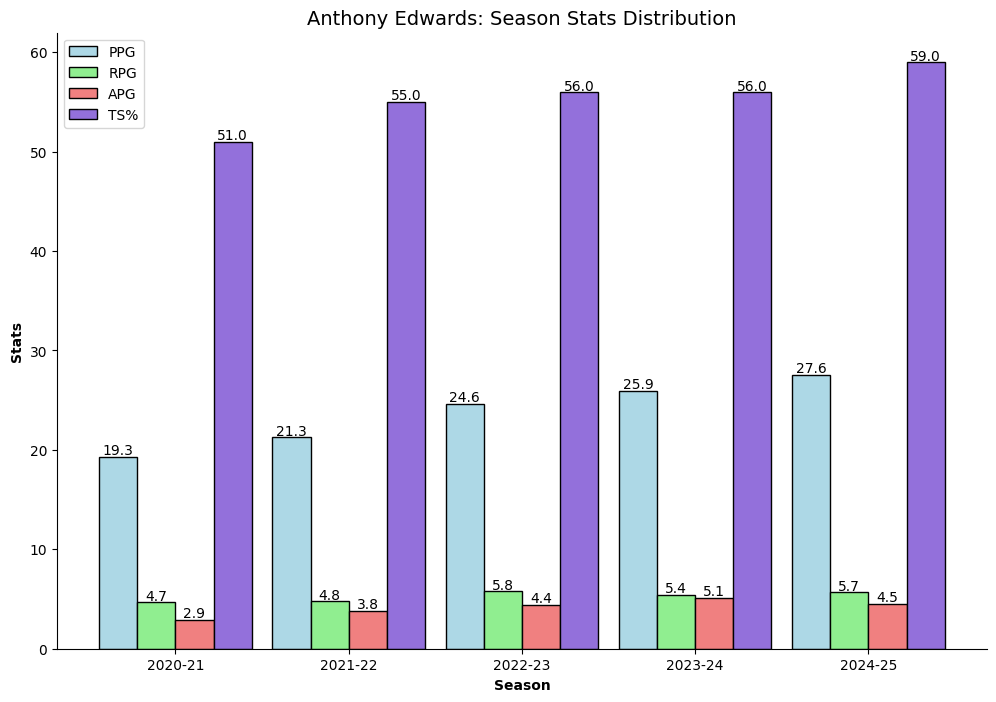

In [5]:
anthonyDF = player_season_means.loc['Anthony Edwards'].reset_index()

# Extract PPG, RPG, APG, and TS% (already averaged per game)
ppg = anthonyDF['PTS']
rpg = anthonyDF['REB'] 
apg = anthonyDF['AST']
ts_pct = anthonyDF['TS_PCT'] * 100

# Get the seasons from the SEASON_ID column
seasons = anthonyDF['SEASON_ID'].tolist()

# Setting the bar width
bar_width = 0.22

# Setting the position of bars on the x-axis
r1 = np.arange(len(seasons))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]  

# Creating the bar chart with white background
plt.figure(figsize=(12, 8))
plt.style.use('default')  # Remove seaborn style for clean white background

bars1 = plt.bar(r1, ppg, color='lightblue', width=bar_width, edgecolor='black', linewidth=1, label='PPG')
bars2 = plt.bar(r2, rpg, color='lightgreen', width=bar_width, edgecolor='black', linewidth=1, label='RPG')
bars3 = plt.bar(r3, apg, color='lightcoral', width=bar_width, edgecolor='black', linewidth=1, label='APG')
bars4 = plt.bar(r4, ts_pct, color='mediumpurple', width=bar_width, edgecolor='black', linewidth=1, label='TS%')

# Adding numbers on top of the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)
for bar in bars4:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 1), ha='center', fontsize=10)

plt.xlabel('Season', fontweight='bold')
plt.ylabel('Stats', fontweight='bold')
plt.title('Anthony Edwards: Season Stats Distribution', fontsize=14)
plt.xticks([r + (bar_width * 1.5) for r in range(len(seasons))], seasons)

ax = plt.gca()
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)  

plt.legend()
plt.show()

## Scoring Profile


SECTION 1: SCORING PROFILE
--------------------------------------------------
📈 Career spans 5 seasons from 2020-21 to 2024-25

Basic Career Stats Overview:
  SEASON_ID    PTS   REB   AST  FG_PCT  FT_PCT  FG3_PCT    MIN
0   2020-21  19.33  4.67  2.93    0.41    0.77     0.32  32.14
1   2021-22  21.29  4.76  3.82    0.43    0.79     0.33  34.18
2   2022-23  24.63  5.80  4.43    0.46    0.73     0.37  36.16
3   2023-24  25.94  5.44  5.13    0.45    0.82     0.35  35.07
4   2024-25  27.56  5.70  4.54    0.45    0.84     0.39  36.34

📊 SECTION 2: VOLUME & EFFICIENCY ANALYSIS
--------------------------------------------------


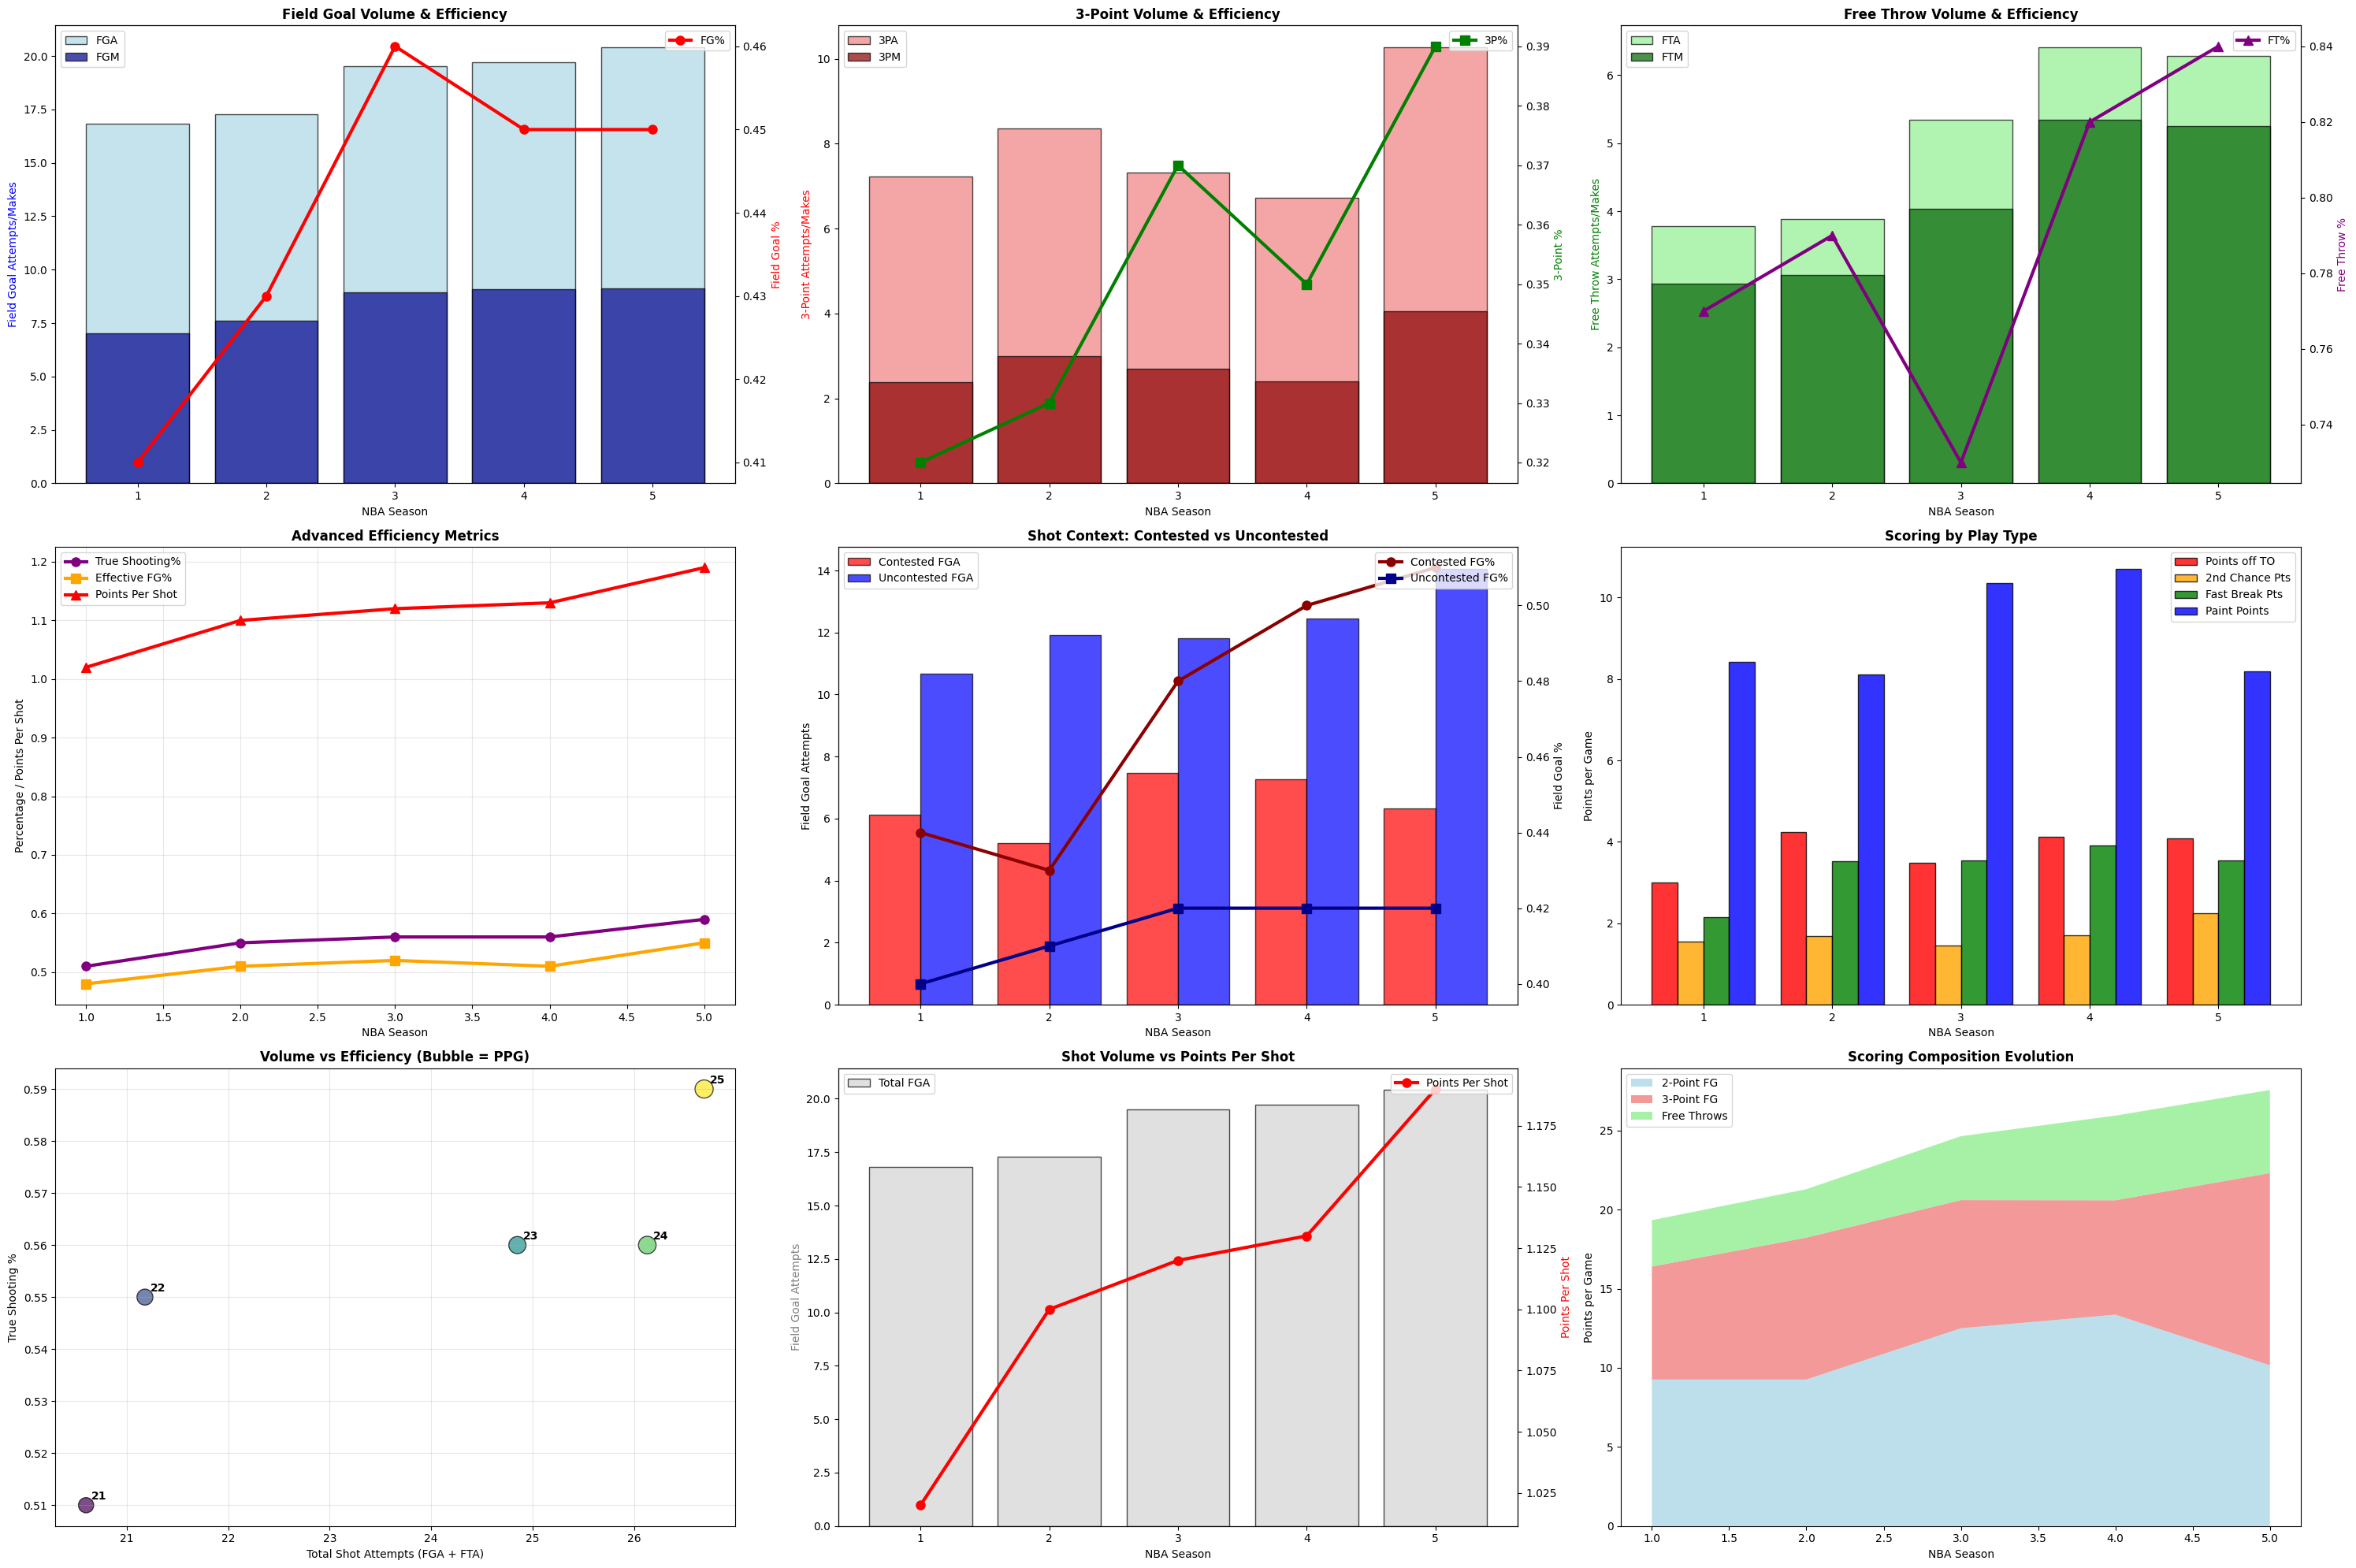


SCORING NARRATIVE ANALYSIS
VOLUME EVOLUTION:
   • FGA per game: 16.8 → 20.4 (+3.6)
   • FTA per game: 3.8 → 6.3 (+2.5)

EFFICIENCY EVOLUTION:
   • True Shooting: 51.0% → 59.0% (+8.0%)
   • Field Goal %: 41.0% → 45.0% (+4.0%)

SCORING NARRATIVE:
Edwards' scoring growth is driven by BOTH increased volume AND improved efficiency

SHOT DIFFICULTY:
   • Contested FG%: 51.0%
   • Uncontested FG%: 42.0%
Excellent at making difficult, contested shots

CONCLUSION: Anthony Edwards has developed into an elite scorer through volume improvement


In [6]:
# 1. CAREER OVERVIEW AND TRENDS
print("\nSECTION 1: SCORING PROFILE")
print("-" * 50)

# Get Anthony Edwards career data from our grouped dataset
anthonyDF = player_season_means.loc['Anthony Edwards'].reset_index()
anthonyDF = anthonyDF.sort_values('SEASON_ID')  # Ensure chronological order

# Add NBA year progression
anthonyDF['NBA_Year'] = range(1, len(anthonyDF) + 1)
anthonyDF['Year'] = anthonyDF['SEASON_ID'].str.split('-').str[0].astype(int) + 1  # Convert 2020-21 to 2021

print(f"📈 Career spans {len(anthonyDF)} seasons from {anthonyDF['SEASON_ID'].iloc[0]} to {anthonyDF['SEASON_ID'].iloc[-1]}")
print("\nBasic Career Stats Overview:")
print(anthonyDF[['SEASON_ID', 'PTS', 'REB', 'AST', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'MIN']].round(2))

# 2. VOLUME & EFFICIENCY ANALYSIS
print(f"\n📊 SECTION 2: VOLUME & EFFICIENCY ANALYSIS")
print("-" * 50)

# Create comprehensive visualization dashboard
plt.style.use('default')  # Clean white background
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
# fig.suptitle('Anthony Edwards: Volume, Efficiency & Shot-Making Analysis', fontsize=20, fontweight='bold', y=0.98)

# 2.1 Volume Analysis - Field Goals
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
bars1 = ax1.bar(anthonyDF['NBA_Year'], anthonyDF['FGA'], alpha=0.7, color='lightblue', edgecolor='black', label='FGA')
bars2 = ax1.bar(anthonyDF['NBA_Year'], anthonyDF['FGM'], alpha=0.7, color='darkblue', edgecolor='black', label='FGM')
line1 = ax1_twin.plot(anthonyDF['NBA_Year'], anthonyDF['FG_PCT'], marker='o', color='red', linewidth=3, markersize=8, label='FG%')
ax1.set_title('Field Goal Volume & Efficiency', fontweight='bold')
ax1.set_xlabel('NBA Season')
ax1.set_ylabel('Field Goal Attempts/Makes', color='blue')
ax1_twin.set_ylabel('Field Goal %', color='red')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# 2.2 3-Point Volume & Efficiency
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
bars3 = ax2.bar(anthonyDF['NBA_Year'], anthonyDF['FG3A'], alpha=0.7, color='lightcoral', edgecolor='black', label='3PA')
bars4 = ax2.bar(anthonyDF['NBA_Year'], anthonyDF['FG3M'], alpha=0.7, color='darkred', edgecolor='black', label='3PM')
line2 = ax2_twin.plot(anthonyDF['NBA_Year'], anthonyDF['FG3_PCT'], marker='s', color='green', linewidth=3, markersize=8, label='3P%')
ax2.set_title('3-Point Volume & Efficiency', fontweight='bold')
ax2.set_xlabel('NBA Season')
ax2.set_ylabel('3-Point Attempts/Makes', color='red')
ax2_twin.set_ylabel('3-Point %', color='green')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# 2.3 Free Throw Volume & Efficiency
ax3 = axes[0, 2]
ax3_twin = ax3.twinx()
bars5 = ax3.bar(anthonyDF['NBA_Year'], anthonyDF['FTA'], alpha=0.7, color='lightgreen', edgecolor='black', label='FTA')
bars6 = ax3.bar(anthonyDF['NBA_Year'], anthonyDF['FTM'], alpha=0.7, color='darkgreen', edgecolor='black', label='FTM')
line3 = ax3_twin.plot(anthonyDF['NBA_Year'], anthonyDF['FT_PCT'], marker='^', color='purple', linewidth=3, markersize=8, label='FT%')
ax3.set_title('Free Throw Volume & Efficiency', fontweight='bold')
ax3.set_xlabel('NBA Season')
ax3.set_ylabel('Free Throw Attempts/Makes', color='green')
ax3_twin.set_ylabel('Free Throw %', color='purple')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 2.4 Advanced Efficiency Metrics
ax4 = axes[1, 0]
ax4.plot(anthonyDF['NBA_Year'], anthonyDF['TS_PCT'], marker='o', linewidth=3, markersize=8, label='True Shooting%', color='purple')
ax4.plot(anthonyDF['NBA_Year'], anthonyDF['EFG_PCT'], marker='s', linewidth=3, markersize=8, label='Effective FG%', color='orange')
if 'POINT_PER_SHOT' in anthonyDF.columns:
    ax4.plot(anthonyDF['NBA_Year'], anthonyDF['POINT_PER_SHOT'], marker='^', linewidth=3, markersize=8, label='Points Per Shot', color='red')
ax4.set_title('Advanced Efficiency Metrics', fontweight='bold')
ax4.set_xlabel('NBA Season')
ax4.set_ylabel('Percentage / Points Per Shot')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 2.5 Shot Context: Contested vs Uncontested
ax5 = axes[1, 1]
if all(col in anthonyDF.columns for col in ['CFGA', 'CFG_PCT', 'UFGA', 'UFG_PCT']):
    ax5_twin = ax5.twinx()
    bars7 = ax5.bar(anthonyDF['NBA_Year'] - 0.2, anthonyDF['CFGA'], width=0.4, alpha=0.7, color='red', edgecolor='black', label='Contested FGA')
    bars8 = ax5.bar(anthonyDF['NBA_Year'] + 0.2, anthonyDF['UFGA'], width=0.4, alpha=0.7, color='blue', edgecolor='black', label='Uncontested FGA')
    line4 = ax5_twin.plot(anthonyDF['NBA_Year'], anthonyDF['CFG_PCT'], marker='o', color='darkred', linewidth=3, markersize=8, label='Contested FG%')
    line5 = ax5_twin.plot(anthonyDF['NBA_Year'], anthonyDF['UFG_PCT'], marker='s', color='darkblue', linewidth=3, markersize=8, label='Uncontested FG%')
    ax5.set_title('Shot Context: Contested vs Uncontested', fontweight='bold')
    ax5.set_xlabel('NBA Season')
    ax5.set_ylabel('Field Goal Attempts', color='black')
    ax5_twin.set_ylabel('Field Goal %', color='black')
    ax5.legend(loc='upper left')
    ax5_twin.legend(loc='upper right')
else:
    # Fallback to shot selection analysis
    ax5.plot(anthonyDF['NBA_Year'], anthonyDF['FGA'], marker='o', linewidth=3, markersize=8, label='Total FGA', color='blue')
    ax5.plot(anthonyDF['NBA_Year'], anthonyDF['FG3A'], marker='s', linewidth=3, markersize=8, label='3-Point FGA', color='red')
    ax5.set_title('Shot Selection Evolution', fontweight='bold')
    ax5.set_xlabel('NBA Season')
    ax5.set_ylabel('Field Goal Attempts')
    ax5.legend()
    ax5.grid(True, alpha=0.3)

# 2.6 Play Type Scoring Output
ax6 = axes[1, 2]
if all(col in anthonyDF.columns for col in ['PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT']):
    width = 0.2
    x = anthonyDF['NBA_Year']
    ax6.bar(x - 1.5*width, anthonyDF['PTS_OFF_TOV'], width, alpha=0.8, color='red', edgecolor='black', label='Points off TO')
    ax6.bar(x - 0.5*width, anthonyDF['PTS_2ND_CHANCE'], width, alpha=0.8, color='orange', edgecolor='black', label='2nd Chance Pts')
    ax6.bar(x + 0.5*width, anthonyDF['PTS_FB'], width, alpha=0.8, color='green', edgecolor='black', label='Fast Break Pts')
    ax6.bar(x + 1.5*width, anthonyDF['PTS_PAINT'], width, alpha=0.8, color='blue', edgecolor='black', label='Paint Points')
    ax6.set_title('Scoring by Play Type', fontweight='bold')
    ax6.set_xlabel('NBA Season')
    ax6.set_ylabel('Points per Game')
    ax6.legend()
else:
    # Fallback to basic scoring breakdown
    ax6.plot(anthonyDF['NBA_Year'], anthonyDF['PTS'], marker='o', linewidth=3, markersize=8, label='Total Points', color='blue')
    ax6.set_title('Scoring Evolution', fontweight='bold')
    ax6.set_xlabel('NBA Season')
    ax6.set_ylabel('Points per Game')
    ax6.legend()
    ax6.grid(True, alpha=0.3)

# 2.7 Volume vs Efficiency Relationship
ax7 = axes[2, 0]
# Scatter plot: Total attempts vs efficiency
total_attempts = anthonyDF['FGA'] + anthonyDF['FTA']
ax7.scatter(total_attempts, anthonyDF['TS_PCT'], s=anthonyDF['PTS']*10, alpha=0.7, 
           c=anthonyDF['NBA_Year'], cmap='viridis', edgecolors='black')
ax7.set_title('Volume vs Efficiency (Bubble = PPG)', fontweight='bold')
ax7.set_xlabel('Total Shot Attempts (FGA + FTA)')
ax7.set_ylabel('True Shooting %')
ax7.grid(True, alpha=0.3)

# Add season labels
for i, season in enumerate(anthonyDF['SEASON_ID']):
    ax7.annotate(season.split('-')[1], 
                (total_attempts.iloc[i], anthonyDF['TS_PCT'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# 2.8 Shot Difficulty Analysis
ax8 = axes[2, 1]
if 'POINT_PER_SHOT' in anthonyDF.columns:
    ax8_twin = ax8.twinx()
    bars9 = ax8.bar(anthonyDF['NBA_Year'], anthonyDF['FGA'], alpha=0.7, color='lightgray', edgecolor='black', label='Total FGA')
    line6 = ax8_twin.plot(anthonyDF['NBA_Year'], anthonyDF['POINT_PER_SHOT'], marker='o', color='red', linewidth=3, markersize=8, label='Points Per Shot')
    ax8.set_title('Shot Volume vs Points Per Shot', fontweight='bold')
    ax8.set_xlabel('NBA Season')
    ax8.set_ylabel('Field Goal Attempts', color='gray')
    ax8_twin.set_ylabel('Points Per Shot', color='red')
    ax8.legend(loc='upper left')
    ax8_twin.legend(loc='upper right')
else:
    # Alternative: Usage vs efficiency
    ax8_twin = ax8.twinx()
    bars9 = ax8.bar(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], alpha=0.7, color='lightcoral', edgecolor='black', label='Usage Rate')
    line6 = ax8_twin.plot(anthonyDF['NBA_Year'], anthonyDF['TS_PCT'], marker='o', color='blue', linewidth=3, markersize=8, label='True Shooting%')
    ax8.set_title('Usage Rate vs Efficiency', fontweight='bold')
    ax8.set_xlabel('NBA Season')
    ax8.set_ylabel('Usage Rate (%)', color='red')
    ax8_twin.set_ylabel('True Shooting %', color='blue')
    ax8.legend(loc='upper left')
    ax8_twin.legend(loc='upper right')

# 2.9 Scoring Evolution Narrative
ax9 = axes[2, 2]
# Stacked area chart showing scoring composition
if all(col in anthonyDF.columns for col in ['FG3M', 'FGM']):
    two_pt_made = anthonyDF['FGM'] - anthonyDF['FG3M']
    three_pt_points = anthonyDF['FG3M'] * 3
    two_pt_points = two_pt_made * 2
    ft_points = anthonyDF['FTM']
    
    ax9.stackplot(anthonyDF['NBA_Year'], two_pt_points, three_pt_points, ft_points,
                 labels=['2-Point FG', '3-Point FG', 'Free Throws'],
                 colors=['lightblue', 'lightcoral', 'lightgreen'], alpha=0.8)
    ax9.set_title('Scoring Composition Evolution', fontweight='bold')
    ax9.set_xlabel('NBA Season')
    ax9.set_ylabel('Points per Game')
    ax9.legend(loc='upper left')
else:
    # Fallback to efficiency trends
    ax9.plot(anthonyDF['NBA_Year'], anthonyDF['FG_PCT'], marker='o', linewidth=3, markersize=8, label='FG%', color='blue')
    ax9.plot(anthonyDF['NBA_Year'], anthonyDF['TS_PCT'], marker='s', linewidth=3, markersize=8, label='TS%', color='red')
    ax9.set_title('Efficiency Evolution', fontweight='bold')
    ax9.set_xlabel('NBA Season')
    ax9.set_ylabel('Shooting Percentage')
    ax9.legend()
    ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# NARRATIVE ANALYSIS
print(f"\nSCORING NARRATIVE ANALYSIS")
print("=" * 60)

# Calculate key metrics for narrative
latest_season = anthonyDF.iloc[-1]
first_season = anthonyDF.iloc[0]

# Volume changes
fga_change = latest_season['FGA'] - first_season['FGA']
fta_change = latest_season['FTA'] - first_season['FTA']

# Efficiency changes  
ts_change = latest_season['TS_PCT'] - first_season['TS_PCT']
fg_change = latest_season['FG_PCT'] - first_season['FG_PCT']

# Difficulty metrics
if 'POINT_PER_SHOT' in anthonyDF.columns:
    pps_change = latest_season['POINT_PER_SHOT'] - first_season['POINT_PER_SHOT']

print(f"VOLUME EVOLUTION:")
print(f"   • FGA per game: {first_season['FGA']:.1f} → {latest_season['FGA']:.1f} ({fga_change:+.1f})")
print(f"   • FTA per game: {first_season['FTA']:.1f} → {latest_season['FTA']:.1f} ({fta_change:+.1f})")

print(f"\nEFFICIENCY EVOLUTION:")
print(f"   • True Shooting: {first_season['TS_PCT']:.1%} → {latest_season['TS_PCT']:.1%} ({ts_change:+.1%})")
print(f"   • Field Goal %: {first_season['FG_PCT']:.1%} → {latest_season['FG_PCT']:.1%} ({fg_change:+.1%})")

print(f"\nSCORING NARRATIVE:")
if fga_change > 2 and ts_change > 0:
    print("Edwards' scoring growth is driven by BOTH increased volume AND improved efficiency")
elif fga_change > 2:
    print("Edwards' scoring growth is primarily VOLUME-driven with high shot attempts")
elif ts_change > 0.05:
    print("Edwards' scoring growth is primarily EFFICIENCY-driven with better shot selection")
else:
    print("Edwards shows balanced development in both volume and efficiency")

# Shot context analysis
if all(col in anthonyDF.columns for col in ['CFG_PCT', 'UFG_PCT']):
    contested_efficiency = latest_season['CFG_PCT']
    uncontested_efficiency = latest_season['UFG_PCT']
    print(f"\nSHOT DIFFICULTY:")
    print(f"   • Contested FG%: {contested_efficiency:.1%}")
    print(f"   • Uncontested FG%: {uncontested_efficiency:.1%}")
    
    if contested_efficiency > 0.45:
        print("Excellent at making difficult, contested shots")
    elif uncontested_efficiency > 0.65:
        print("Excellent at capitalizing on open looks")

print(f"\nCONCLUSION: Anthony Edwards has developed into an elite scorer through {['volume', 'efficiency', 'shot-making'][0 if fga_change > ts_change else 1 if ts_change > 0.05 else 2]} improvement")

## Usage and Offensive Role


SECTION 2: Usage & Offensive Role
------------------------------------------------------------


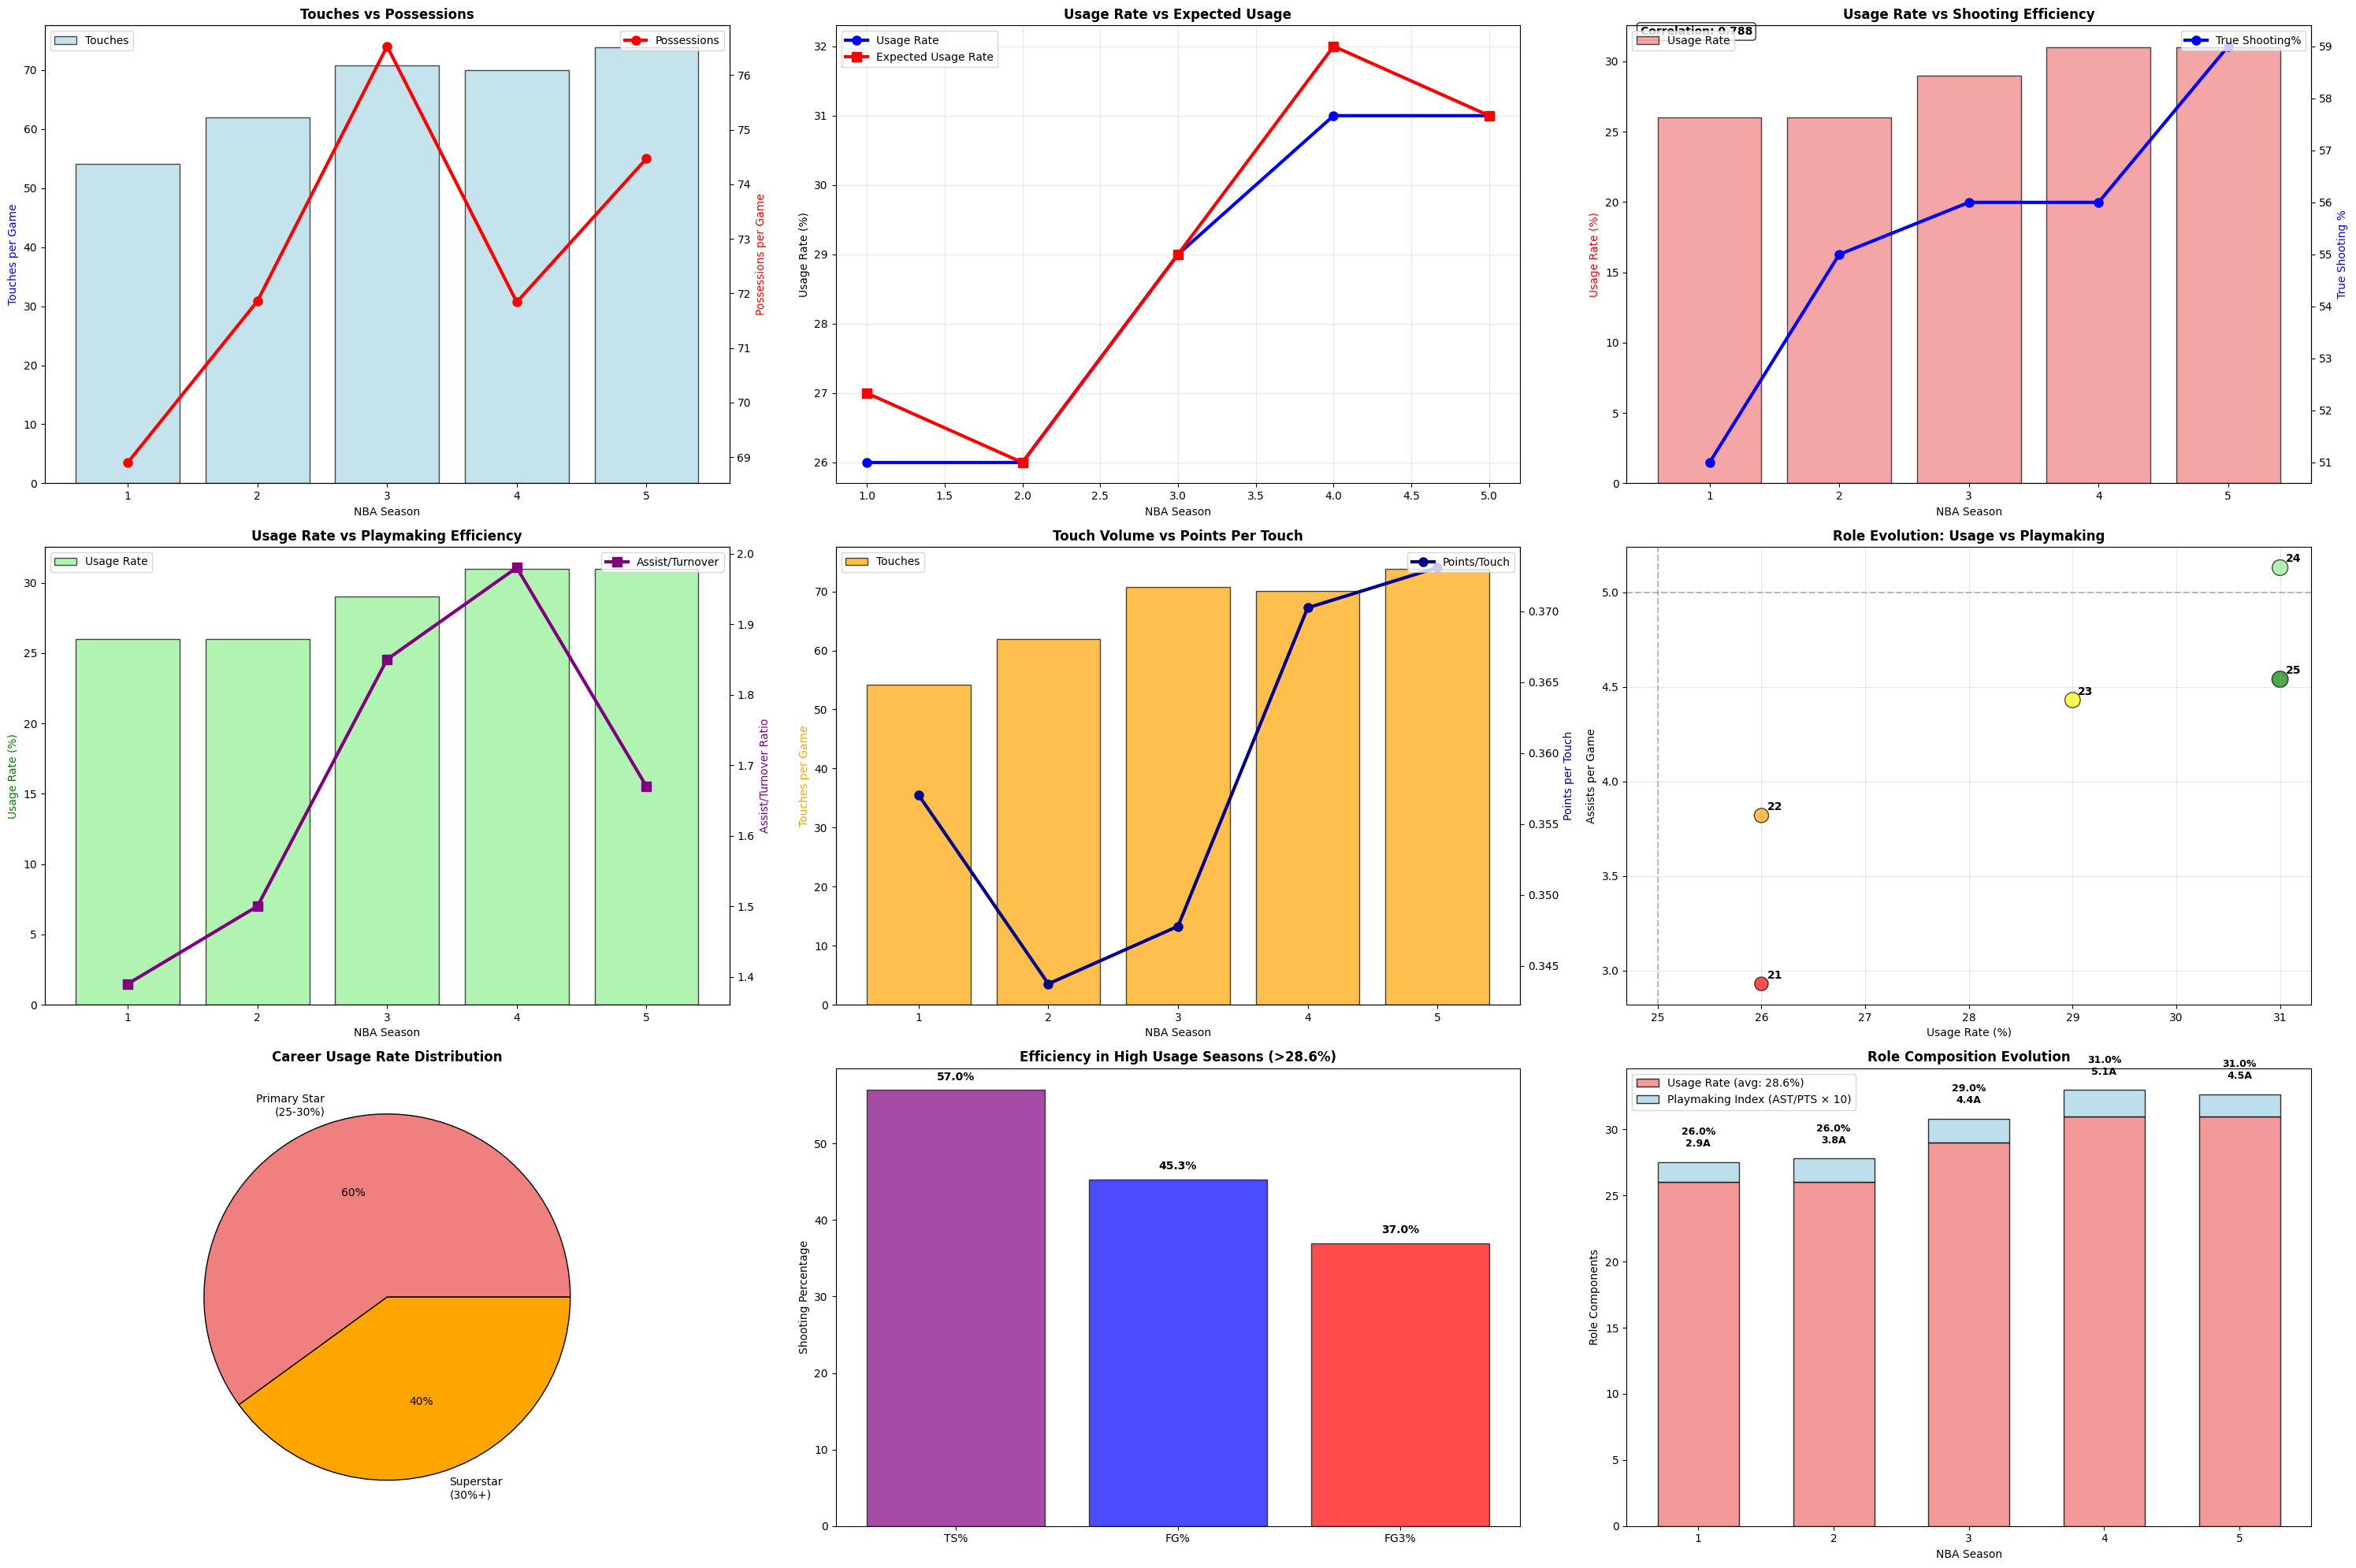


🎭 ROLE EVOLUTION NARRATIVE ANALYSIS
📊 USAGE RATE EVOLUTION:
   • Career Progression: 26.0% → 31.0% (+5.0%)
   • Current Level: 31.0% Usage Rate

👑 CURRENT ROLE: PRIMARY CREATOR & SUPERSTAR

🎯 EFFICIENCY UNDER VOLUME:
   • Current TS%: 59.0%

👋 TOUCH EFFICIENCY:
   • Points per Touch: 0.37
   ⚠️ Room for improvement in touch efficiency

🎭 OVERALL ROLE EVOLUTION:
----------------------------------------
🏆 FINAL CLASSIFICATION: PRIMARY SCORER
📝 Description: Go-to offensive option with high usage but limited playmaking

🔗 USAGE-EFFICIENCY RELATIONSHIP:
📈 POSITIVE correlation - gets MORE efficient with increased usage (Rare Elite trait)
   Correlation coefficient: 0.788


In [7]:
print(f"\nSECTION 2: Usage & Offensive Role")
print("-" * 60)

if anthonyDF['USG_PCT'].max() <= 1.0:
    anthonyDF['USG_PCT'] = anthonyDF['USG_PCT'] * 100
    if 'E_USG_PCT' in anthonyDF.columns:
        anthonyDF['E_USG_PCT'] = anthonyDF['E_USG_PCT'] * 100

# Create touches and usage visualization dashboard
plt.style.use('default')
fig, axes = plt.subplots(3, 3, figsize=(30, 20))

# 3.1 Touches and Possessions
ax1 = axes[0, 0]
if all(col in anthonyDF.columns for col in ['TCHS', 'POSS']):
    ax1_twin = ax1.twinx()
    bars1 = ax1.bar(anthonyDF['NBA_Year'], anthonyDF['TCHS'], alpha=0.7, color='lightblue', edgecolor='black', label='Touches')
    line1 = ax1_twin.plot(anthonyDF['NBA_Year'], anthonyDF['POSS'], marker='o', color='red', linewidth=3, markersize=8, label='Possessions')
    ax1.set_title('Touches vs Possessions', fontweight='bold')
    ax1.set_xlabel('NBA Season')
    ax1.set_ylabel('Touches per Game', color='blue')
    ax1_twin.set_ylabel('Possessions per Game', color='red')
    ax1.legend(loc='upper left')
    ax1_twin.legend(loc='upper right')
else:
    # Fallback to usage and minutes
    ax1_twin = ax1.twinx()
    bars1 = ax1.bar(anthonyDF['NBA_Year'], anthonyDF['MIN'], alpha=0.7, color='lightblue', edgecolor='black', label='Minutes')
    line1 = ax1_twin.plot(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], marker='o', color='red', linewidth=3, markersize=8, label='Usage Rate')
    ax1.set_title('Minutes vs Usage Rate', fontweight='bold')
    ax1.set_xlabel('NBA Season')
    ax1.set_ylabel('Minutes per Game', color='blue')
    ax1_twin.set_ylabel('Usage Rate (%)', color='red')
    ax1.legend(loc='upper left')
    ax1_twin.legend(loc='upper right')

# 3.2 Usage Rate Evolution
ax2 = axes[0, 1]
if 'E_USG_PCT' in anthonyDF.columns:
    ax2.plot(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], marker='o', linewidth=3, markersize=8, label='Usage Rate', color='blue')
    ax2.plot(anthonyDF['NBA_Year'], anthonyDF['E_USG_PCT'], marker='s', linewidth=3, markersize=8, label='Expected Usage Rate', color='red')
    ax2.set_title('Usage Rate vs Expected Usage', fontweight='bold')
    ax2.set_xlabel('NBA Season')
    ax2.set_ylabel('Usage Rate (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
else:
    # Show usage rate evolution with context
    ax2.plot(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], marker='o', linewidth=3, markersize=8, label='Usage Rate', color='blue')
    ax2.axhline(y=20, color='red', linestyle='--', alpha=0.7, label='Star Level (20%)')
    ax2.axhline(y=25, color='darkred', linestyle='--', alpha=0.7, label='Superstar Level (25%)')
    ax2.set_title('Usage Rate Evolution', fontweight='bold')
    ax2.set_xlabel('NBA Season')
    ax2.set_ylabel('Usage Rate (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# 3.3 Efficiency Under Volume (Usage vs True Shooting)
ax3 = axes[0, 2]
ax3_twin = ax3.twinx()
bars2 = ax3.bar(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], alpha=0.7, color='lightcoral', edgecolor='black', label='Usage Rate')
ts_pct_display = anthonyDF['TS_PCT'] * 100 if anthonyDF['TS_PCT'].max() <= 1.0 else anthonyDF['TS_PCT']
line2 = ax3_twin.plot(anthonyDF['NBA_Year'], ts_pct_display, marker='o', color='blue', linewidth=3, markersize=8, label='True Shooting%')
ax3.set_title('Usage Rate vs Shooting Efficiency', fontweight='bold')
ax3.set_xlabel('NBA Season')
ax3.set_ylabel('Usage Rate (%)', color='red')
ax3_twin.set_ylabel('True Shooting %', color='blue')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# Add correlation coefficient
usg_ts_corr = anthonyDF['USG_PCT'].corr(anthonyDF['TS_PCT'])
ax3.text(0.02, 0.98, f'Correlation: {usg_ts_corr:.3f}', transform=ax3.transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')

# 3.4 Playmaking Under Usage (Usage vs Assist-to-Turnover)
ax4 = axes[1, 0]
if 'AST_TOV' in anthonyDF.columns:
    ax4_twin = ax4.twinx()
    bars3 = ax4.bar(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], alpha=0.7, color='lightgreen', edgecolor='black', label='Usage Rate')
    line3 = ax4_twin.plot(anthonyDF['NBA_Year'], anthonyDF['AST_TOV'], marker='s', color='purple', linewidth=3, markersize=8, label='Assist/Turnover')
    ax4.set_title('Usage Rate vs Playmaking Efficiency', fontweight='bold')
    ax4.set_xlabel('NBA Season')
    ax4.set_ylabel('Usage Rate (%)', color='green')
    ax4_twin.set_ylabel('Assist/Turnover Ratio', color='purple')
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
else:
    # Alternative: Usage vs Assists
    ax4_twin = ax4.twinx()
    bars3 = ax4.bar(anthonyDF['NBA_Year'], anthonyDF['USG_PCT'], alpha=0.7, color='lightgreen', edgecolor='black', label='Usage Rate')
    line3 = ax4_twin.plot(anthonyDF['NBA_Year'], anthonyDF['AST'], marker='s', color='purple', linewidth=3, markersize=8, label='Assists')
    ax4.set_title('Usage Rate vs Assists', fontweight='bold')
    ax4.set_xlabel('NBA Season')
    ax4.set_ylabel('Usage Rate (%)', color='green')
    ax4_twin.set_ylabel('Assists per Game', color='purple')
    ax4.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')

# 3.5 Touch Efficiency (if touches available)
ax5 = axes[1, 1]
if 'TCHS' in anthonyDF.columns:
    # Points per touch
    points_per_touch = anthonyDF['PTS'] / anthonyDF['TCHS']
    ax5_twin = ax5.twinx()
    bars4 = ax5.bar(anthonyDF['NBA_Year'], anthonyDF['TCHS'], alpha=0.7, color='orange', edgecolor='black', label='Touches')
    line4 = ax5_twin.plot(anthonyDF['NBA_Year'], points_per_touch, marker='o', color='darkblue', linewidth=3, markersize=8, label='Points/Touch')
    ax5.set_title('Touch Volume vs Points Per Touch', fontweight='bold')
    ax5.set_xlabel('NBA Season')
    ax5.set_ylabel('Touches per Game', color='orange')
    ax5_twin.set_ylabel('Points per Touch', color='darkblue')
    ax5.legend(loc='upper left')
    ax5_twin.legend(loc='upper right')
else:
    # Alternative: Shot attempts vs points
    shots_per_point = anthonyDF['FGA'] / anthonyDF['PTS']
    ax5_twin = ax5.twinx()
    bars4 = ax5.bar(anthonyDF['NBA_Year'], anthonyDF['FGA'], alpha=0.7, color='orange', edgecolor='black', label='Shot Attempts')
    line4 = ax5_twin.plot(anthonyDF['NBA_Year'], shots_per_point, marker='o', color='darkblue', linewidth=3, markersize=8, label='Shots/Point')
    ax5.set_title('Shot Volume vs Shots Per Point', fontweight='bold')
    ax5.set_xlabel('NBA Season')
    ax5.set_ylabel('FGA per Game', color='orange')
    ax5_twin.set_ylabel('Shots per Point', color='darkblue')
    ax5.legend(loc='upper left')
    ax5_twin.legend(loc='upper right')

# 3.6 Role Classification Scatter Plot
ax6 = axes[1, 2]
# Usage vs Assists scatter to show role evolution
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green'][:len(anthonyDF)]
scatter = ax6.scatter(anthonyDF['USG_PCT'], anthonyDF['AST'], 
                     s=anthonyDF['PTS']*8, c=colors, alpha=0.7, edgecolors='black')

# Add role zones
ax6.axhline(y=5, color='gray', linestyle='--', alpha=0.5, label='High Playmaker (5+ APG)')
ax6.axvline(x=25, color='gray', linestyle='--', alpha=0.5, label='Primary Option (25% USG)')

ax6.set_title('Role Evolution: Usage vs Playmaking', fontweight='bold')
ax6.set_xlabel('Usage Rate (%)')
ax6.set_ylabel('Assists per Game')
ax6.grid(True, alpha=0.3)

# Add season labels
for i, season in enumerate(anthonyDF['SEASON_ID']):
    ax6.annotate(season.split('-')[1], 
                (anthonyDF['USG_PCT'].iloc[i], anthonyDF['AST'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# 3.7 Usage Rate Distribution Analysis - FIXED
ax7 = axes[2, 0]
usage_categories = []
for usage in anthonyDF['USG_PCT']:
    if usage < 20:
        usage_categories.append('Role Player\n(<20%)')
    elif usage < 25:
        usage_categories.append('Secondary Star\n(20-25%)')
    elif usage < 30:
        usage_categories.append('Primary Star\n(25-30%)')
    else:
        usage_categories.append('Superstar\n(30%+)')

usage_counts = pd.Series(usage_categories).value_counts()
ax7.pie(usage_counts.values, labels=usage_counts.index, autopct='%1.0f%%', 
        colors=['lightcoral', 'orange', 'lightblue', 'lightgreen'], 
        wedgeprops=dict(edgecolor='black'))
ax7.set_title('Career Usage Rate Distribution', fontweight='bold')

# 3.8 Efficiency Consistency Under High Usage
ax8 = axes[2, 1]
# Show efficiency metrics when usage is above average
avg_usage = anthonyDF['USG_PCT'].mean()
high_usage_seasons = anthonyDF[anthonyDF['USG_PCT'] > avg_usage]

metrics = ['TS_PCT', 'FG_PCT', 'FG3_PCT']
if len(high_usage_seasons) > 0:
    efficiency_data = []
    labels = []
    for metric in metrics:
        if metric in high_usage_seasons.columns:
            # Convert to percentage for display if needed
            value = high_usage_seasons[metric].mean()
            if value <= 1.0:
                value = value * 100
            efficiency_data.append(value)
            labels.append(metric.replace('_PCT', '%').replace('_', ' '))
    
    bars5 = ax8.bar(labels, efficiency_data, color=['purple', 'blue', 'red'], alpha=0.7, edgecolor='black')
    ax8.set_title(f'Efficiency in High Usage Seasons (>{avg_usage:.1f}%)', fontweight='bold')
    ax8.set_ylabel('Shooting Percentage')
    
    # Add value labels
    for i, v in enumerate(efficiency_data):
        ax8.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
else:
    ax8.text(0.5, 0.5, 'Insufficient High Usage Data', ha='center', va='center', transform=ax8.transAxes)
    ax8.set_title('High Usage Efficiency Analysis', fontweight='bold')

# 3.9 Role Evolution Timeline - FIXED
ax9 = axes[2, 2]
# Calculate assist rate as a percentage (assists per 100 possessions or similar)
assist_rate = (anthonyDF['AST'] / anthonyDF['PTS']) * 10  # Scale factor for visualization
usage_rate = anthonyDF['USG_PCT']

# Create stacked bar chart with proper scaling
width = 0.6
ax9.bar(anthonyDF['NBA_Year'], usage_rate, width, alpha=0.8, color='lightcoral', 
        edgecolor='black', label=f'Usage Rate (avg: {usage_rate.mean():.1f}%)')
ax9.bar(anthonyDF['NBA_Year'], assist_rate, width, bottom=usage_rate, alpha=0.8, 
        color='lightblue', edgecolor='black', label=f'Playmaking Index (AST/PTS × 10)')

ax9.set_title('Role Composition Evolution', fontweight='bold')
ax9.set_xlabel('NBA Season')
ax9.set_ylabel('Role Components')
ax9.legend()

# Add text annotations with actual values
for i, year in enumerate(anthonyDF['NBA_Year']):
    total_height = usage_rate.iloc[i] + assist_rate.iloc[i]
    ax9.text(year, total_height + 1, f'{usage_rate.iloc[i]:.1f}%\n{anthonyDF["AST"].iloc[i]:.1f}A', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ROLE EVOLUTION NARRATIVE - Updated with correct percentages
print(f"\n🎭 ROLE EVOLUTION NARRATIVE ANALYSIS")
print("=" * 70)

# Calculate role metrics
latest_season = anthonyDF.iloc[-1]
first_season = anthonyDF.iloc[0]
# Fix: Only calculate mean for numeric columns
career_avg = anthonyDF.select_dtypes(include=[np.number]).mean()

# Usage evolution
usage_change = latest_season['USG_PCT'] - first_season['USG_PCT']
current_usage = latest_season['USG_PCT']

# Efficiency under volume (ensure TS_PCT is in correct format)
ts_values = anthonyDF['TS_PCT']
if ts_values.max() <= 1.0:
    ts_values = ts_values * 100

high_usage_efficiency = ts_values[anthonyDF['USG_PCT'] > 25].mean() if len(anthonyDF[anthonyDF['USG_PCT'] > 25]) > 0 else 0
low_usage_efficiency = ts_values[anthonyDF['USG_PCT'] <= 25].mean() if len(anthonyDF[anthonyDF['USG_PCT'] <= 25]) > 0 else 0

# Playmaking evolution
assist_change = latest_season['AST'] - first_season['AST']
current_assists = latest_season['AST']

print(f"📊 USAGE RATE EVOLUTION:")
print(f"   • Career Progression: {first_season['USG_PCT']:.1f}% → {latest_season['USG_PCT']:.1f}% ({usage_change:+.1f}%)")
print(f"   • Current Level: {current_usage:.1f}% Usage Rate")

# Determine current role
if current_usage >= 28:
    current_role = "PRIMARY CREATOR & SUPERSTAR"
    role_icon = "👑"
elif current_usage >= 25:
    current_role = "PRIMARY OPTION & STAR"
    role_icon = "⭐"
elif current_usage >= 22:
    current_role = "SECONDARY SCORER & KEY CONTRIBUTOR"
    role_icon = "🎯"
else:
    current_role = "ROLE PLAYER & COMPLEMENTARY PIECE"
    role_icon = "🔧"

print(f"\n{role_icon} CURRENT ROLE: {current_role}")

print(f"\n🎯 EFFICIENCY UNDER VOLUME:")
if high_usage_efficiency > 0 and low_usage_efficiency > 0:
    efficiency_diff = high_usage_efficiency - low_usage_efficiency
    print(f"   • High Usage (25%+) TS%: {high_usage_efficiency:.1%}")
    print(f"   • Lower Usage (<25%) TS%: {low_usage_efficiency:.1%}")
    print(f"   • Efficiency Change: {efficiency_diff:+.1%}")
    
    if efficiency_diff > -0.02:
        print("   ✅ MAINTAINS efficiency with increased usage (Elite trait)")
    elif efficiency_diff > -0.05:
        print("   ⚠️ SLIGHT efficiency drop with increased usage (Normal)")
    else:
        print("   ❌ SIGNIFICANT efficiency drop with increased usage")
else:
    print(f"   • Current TS%: {latest_season['TS_PCT']:.1%}")

# Touch efficiency analysis
if 'TCHS' in anthonyDF.columns:
    touch_efficiency = latest_season['PTS'] / latest_season['TCHS']
    print(f"\n👋 TOUCH EFFICIENCY:")
    print(f"   • Points per Touch: {touch_efficiency:.2f}")
    
    if touch_efficiency > 0.5:
        print("   🔥 ELITE touch efficiency - maximizes every possession")
    elif touch_efficiency > 0.4:
        print("   ✅ GOOD touch efficiency - effective with the ball")
    else:
        print("   ⚠️ Room for improvement in touch efficiency")

# Overall role determination
print(f"\n🎭 OVERALL ROLE EVOLUTION:")
print("-" * 40)

if current_usage >= 25 and current_assists >= 5:
    overall_role = "COMPLETE PRIMARY CREATOR"
    role_description = "Elite scorer AND facilitator - true franchise cornerstone"
elif current_usage >= 25:
    overall_role = "PRIMARY SCORER"
    role_description = "Go-to offensive option with high usage but limited playmaking"
elif current_assists >= 5:
    overall_role = "PLAYMAKING WING"
    role_description = "Secondary scorer with primary playmaking responsibilities"
elif current_usage >= 22:
    overall_role = "SECONDARY STAR"
    role_description = "Key scoring option without primary creation duties"
else:
    overall_role = "COMPLEMENTARY PLAYER"
    role_description = "Role player with specific offensive contributions"

print(f"🏆 FINAL CLASSIFICATION: {overall_role}")
print(f"📝 Description: {role_description}")

# Correlation insights
print(f"\n🔗 USAGE-EFFICIENCY RELATIONSHIP:")
if usg_ts_corr > 0.3:
    print("📈 POSITIVE correlation - gets MORE efficient with increased usage (Rare Elite trait)")
elif usg_ts_corr > -0.3:
    print("➡️ NEUTRAL correlation - maintains efficiency regardless of usage (Good)")
else:
    print("📉 NEGATIVE correlation - efficiency drops with increased usage (Common)")

print(f"   Correlation coefficient: {usg_ts_corr:.3f}")

## Advanced Impact and Team Context


🏆 SECTION 3: ADVANCED IMPACT & TEAM CONTEXT
------------------------------------------------------------


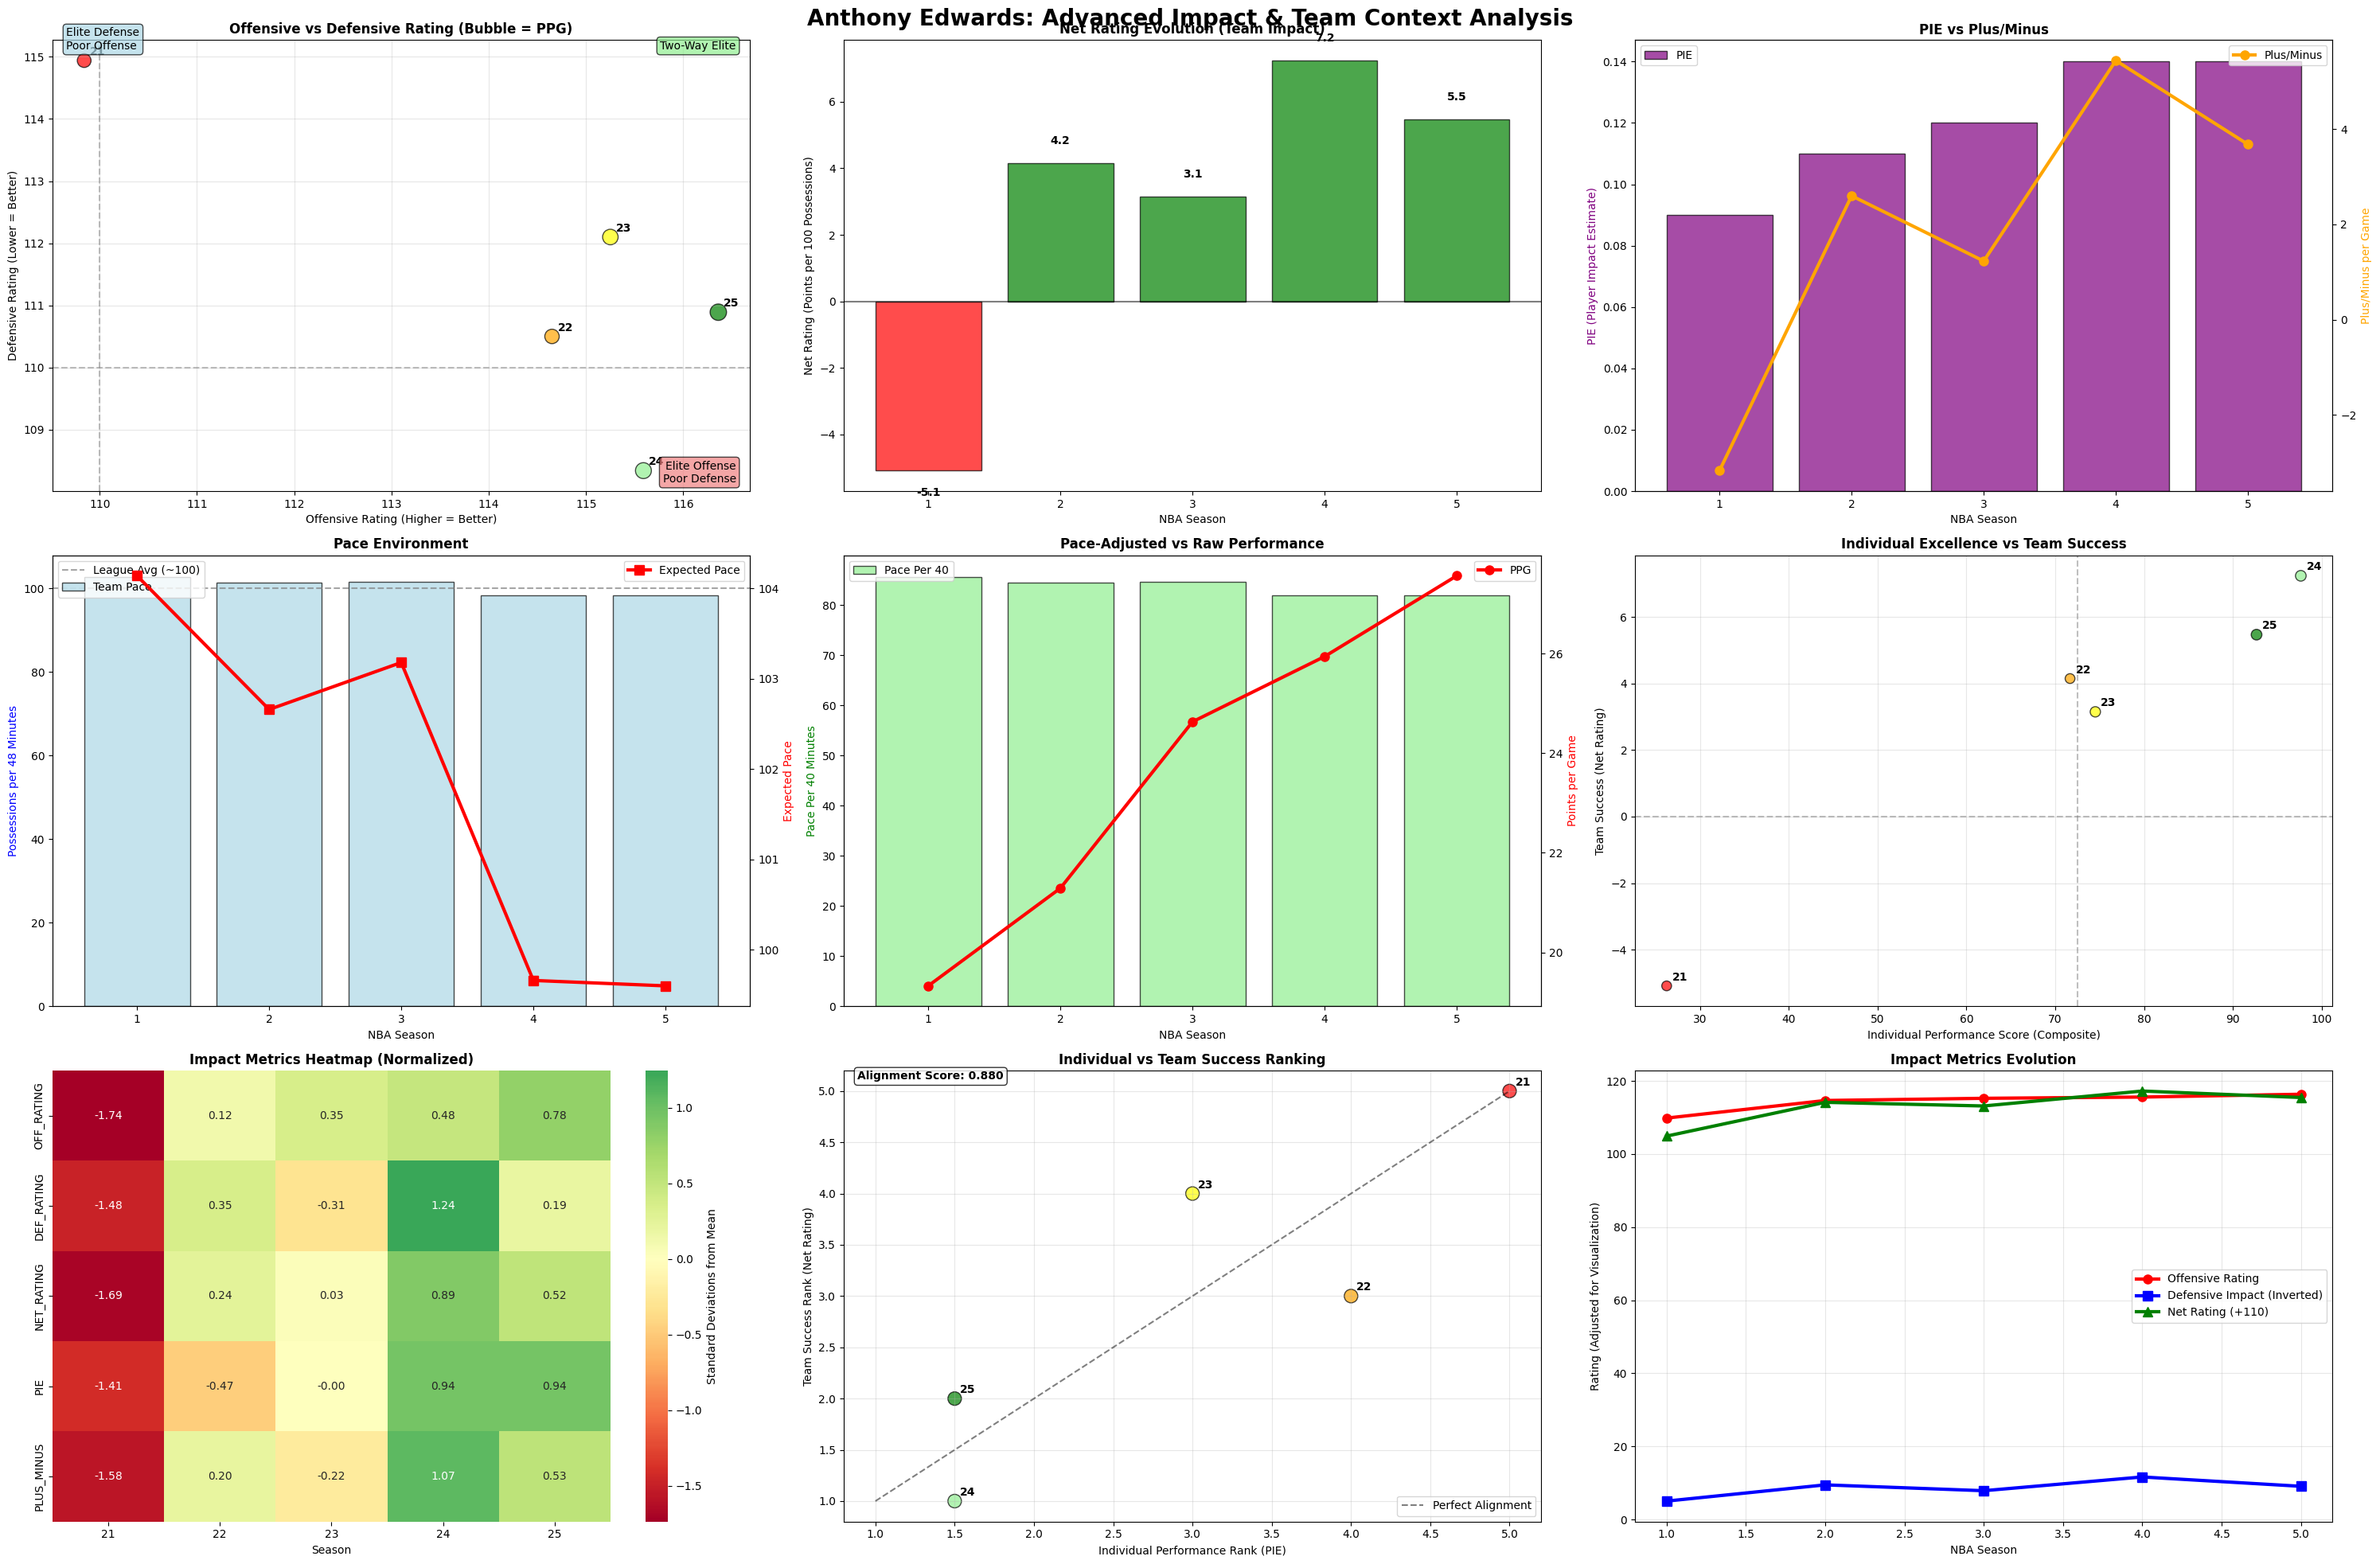


🎯 ADVANCED IMPACT & TEAM CONTEXT ANALYSIS
📊 IMPACT METRICS EVOLUTION:
   • Offensive Rating: 109.8 → 116.4 (+6.5)
   • Defensive Rating: 114.9 → 110.9 (-4.0)
   • Net Rating: -5.1 → 5.5 (+10.6)
   • PIE: 0.090 → 0.140 (+0.050)

⚡ PACE ENVIRONMENT ANALYSIS:
   • Career Average Pace: 100.4 possessions per 48 min
   • Pace Variation: 4.5 (Range across career)
   • Pace-Performance Correlation: -0.882
   • Pace Preference: EXCELS in slow, half-court games

🏆 INDIVIDUAL EXCELLENCE vs TEAM SUCCESS:
--------------------------------------------------
🌟 Best Individual Season: 2023-24
   • PIE: 0.140
   • Points: 25.9 PPG
   • Net Rating: 7.2

🏆 Best Team Success Season: 2023-24
   • Net Rating: 7.2
   • PIE: 0.140
   • Points: 25.9 PPG


In [8]:
# 4. ADVANCED IMPACT & TEAM CONTEXT ANALYSIS
print(f"\n🏆 SECTION 3: ADVANCED IMPACT & TEAM CONTEXT")
print("-" * 60)

# Create advanced impact visualization dashboard
plt.style.use('default')
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
fig.suptitle('Anthony Edwards: Advanced Impact & Team Context Analysis', fontsize=20, fontweight='bold', y=0.98)

# 4.1 Offensive vs Defensive Impact
ax1 = axes[0, 0]
# Scatter plot: OFF_RATING vs DEF_RATING
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green'][:len(anthonyDF)]
scatter = ax1.scatter(anthonyDF['OFF_RATING'], anthonyDF['DEF_RATING'], 
                     s=anthonyDF['PTS']*8, c=colors, alpha=0.7, edgecolors='black')

# Add quadrant lines (league average ~110)
ax1.axhline(y=110, color='gray', linestyle='--', alpha=0.5, label='Avg Defense (110)')
ax1.axvline(x=110, color='gray', linestyle='--', alpha=0.5, label='Avg Offense (110)')

ax1.set_title('Offensive vs Defensive Rating (Bubble = PPG)', fontweight='bold')
ax1.set_xlabel('Offensive Rating (Higher = Better)')
ax1.set_ylabel('Defensive Rating (Lower = Better)')
ax1.grid(True, alpha=0.3)

# Add season labels
for i, season in enumerate(anthonyDF['SEASON_ID']):
    ax1.annotate(season.split('-')[1], 
                (anthonyDF['OFF_RATING'].iloc[i], anthonyDF['DEF_RATING'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# Add quadrant labels
ax1.text(0.02, 0.98, 'Elite Defense\nPoor Offense', transform=ax1.transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7), fontsize=10)
ax1.text(0.98, 0.02, 'Elite Offense\nPoor Defense', transform=ax1.transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7), fontsize=10, ha='right')
ax1.text(0.98, 0.98, 'Two-Way Elite', transform=ax1.transAxes, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7), fontsize=10, ha='right')

# 4.2 Net Rating Evolution
ax2 = axes[0, 1]
# Bar chart with color coding for positive/negative
colors_net = ['green' if x > 0 else 'red' for x in anthonyDF['NET_RATING']]
bars = ax2.bar(anthonyDF['NBA_Year'], anthonyDF['NET_RATING'], 
               color=colors_net, alpha=0.7, edgecolor='black')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.set_title('Net Rating Evolution (Team Impact)', fontweight='bold')
ax2.set_xlabel('NBA Season')
ax2.set_ylabel('Net Rating (Points per 100 Possessions)')

# Add value labels
for i, v in enumerate(anthonyDF['NET_RATING']):
    ax2.text(i+1, v + (0.5 if v > 0 else -0.5), f'{v:.1f}', 
             ha='center', va='bottom' if v > 0 else 'top', fontweight='bold')

# 4.3 Player Impact Estimate (PIE) vs Plus/Minus
ax3 = axes[0, 2]
if 'PLUS_MINUS' in anthonyDF.columns:
    ax3_twin = ax3.twinx()
    bars = ax3.bar(anthonyDF['NBA_Year'], anthonyDF['PIE'], alpha=0.7, 
                   color='purple', edgecolor='black', label='PIE')
    line = ax3_twin.plot(anthonyDF['NBA_Year'], anthonyDF['PLUS_MINUS'], 
                        marker='o', color='orange', linewidth=3, markersize=8, label='Plus/Minus')
    ax3.set_title('PIE vs Plus/Minus', fontweight='bold')
    ax3.set_xlabel('NBA Season')
    ax3.set_ylabel('PIE (Player Impact Estimate)', color='purple')
    ax3_twin.set_ylabel('Plus/Minus per Game', color='orange')
    ax3.legend(loc='upper left')
    ax3_twin.legend(loc='upper right')
else:
    # Fallback to PIE only
    bars = ax3.bar(anthonyDF['NBA_Year'], anthonyDF['PIE'], alpha=0.7, 
                   color='purple', edgecolor='black')
    ax3.set_title('Player Impact Estimate (PIE)', fontweight='bold')
    ax3.set_xlabel('NBA Season')
    ax3.set_ylabel('PIE')
    
    # Add value labels
    for i, v in enumerate(anthonyDF['PIE']):
        ax3.text(i+1, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 4.4 Pace Environment Analysis
ax4 = axes[1, 0]
ax4_twin = ax4.twinx()
bars = ax4.bar(anthonyDF['NBA_Year'], anthonyDF['PACE'], alpha=0.7, 
               color='lightblue', edgecolor='black', label='Team Pace')
if 'E_PACE' in anthonyDF.columns:
    line = ax4_twin.plot(anthonyDF['NBA_Year'], anthonyDF['E_PACE'], 
                        marker='s', color='red', linewidth=3, markersize=8, label='Expected Pace')
    ax4_twin.set_ylabel('Expected Pace', color='red')
    ax4_twin.legend(loc='upper right')

# Add league average pace line (~100)
ax4.axhline(y=100, color='gray', linestyle='--', alpha=0.7, label='League Avg (~100)')
ax4.set_title('Pace Environment', fontweight='bold')
ax4.set_xlabel('NBA Season')
ax4.set_ylabel('Possessions per 48 Minutes', color='blue')
ax4.legend(loc='upper left')

# 4.5 Pace-Adjusted Performance
ax5 = axes[1, 1]
if 'PACE_PER40' in anthonyDF.columns:
    ax5_twin = ax5.twinx()
    bars = ax5.bar(anthonyDF['NBA_Year'], anthonyDF['PACE_PER40'], alpha=0.7, 
                   color='lightgreen', edgecolor='black', label='Pace Per 40')
    line = ax5_twin.plot(anthonyDF['NBA_Year'], anthonyDF['PTS'], 
                        marker='o', color='red', linewidth=3, markersize=8, label='PPG')
    ax5.set_title('Pace-Adjusted vs Raw Performance', fontweight='bold')
    ax5.set_xlabel('NBA Season')
    ax5.set_ylabel('Pace Per 40 Minutes', color='green')
    ax5_twin.set_ylabel('Points per Game', color='red')
    ax5.legend(loc='upper left')
    ax5_twin.legend(loc='upper right')
else:
    # Alternative: Pace vs Performance correlation
    ax5.scatter(anthonyDF['PACE'], anthonyDF['PTS'], s=100, alpha=0.7, 
               c=colors, edgecolors='black')
    ax5.set_title('Pace vs Scoring Performance', fontweight='bold')
    ax5.set_xlabel('Team Pace')
    ax5.set_ylabel('Points per Game')
    ax5.grid(True, alpha=0.3)
    
    # Add correlation
    pace_pts_corr = anthonyDF['PACE'].corr(anthonyDF['PTS'])
    ax5.text(0.02, 0.98, f'Correlation: {pace_pts_corr:.3f}', transform=ax5.transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')

# 4.6 Individual Excellence vs Team Success Matrix
ax6 = axes[1, 2]
# Create a composite individual performance score
individual_score = (
    (anthonyDF['PTS'] / anthonyDF['PTS'].max()) * 0.4 +  # Scoring weight
    (anthonyDF['PIE'] / anthonyDF['PIE'].max()) * 0.3 +   # Impact weight
    (anthonyDF['NET_RATING'] / anthonyDF['NET_RATING'].max()) * 0.3  # Team success weight
) * 100

# Use NET_RATING as proxy for team success
team_success = anthonyDF['NET_RATING']

scatter = ax6.scatter(individual_score, team_success, s=anthonyDF['USG_PCT']*3, 
                     c=colors, alpha=0.7, edgecolors='black')
ax6.set_title('Individual Excellence vs Team Success', fontweight='bold')
ax6.set_xlabel('Individual Performance Score (Composite)')
ax6.set_ylabel('Team Success (Net Rating)')
ax6.grid(True, alpha=0.3)

# Add quadrant lines
ax6.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax6.axvline(x=individual_score.mean(), color='gray', linestyle='--', alpha=0.5)

# Add season labels
for i, season in enumerate(anthonyDF['SEASON_ID']):
    ax6.annotate(season.split('-')[1], 
                (individual_score.iloc[i], team_success.iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# 4.7 Impact Metrics Heatmap
ax7 = axes[2, 0]
impact_metrics = ['OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PIE']
if 'PLUS_MINUS' in anthonyDF.columns:
    impact_metrics.append('PLUS_MINUS')

# Normalize metrics for heatmap (z-score)
impact_data = anthonyDF[impact_metrics].copy()
for col in impact_metrics:
    if col == 'DEF_RATING':  # Lower is better for defense
        impact_data[col] = -impact_data[col]  # Invert for consistent coloring
    impact_data[col] = (impact_data[col] - impact_data[col].mean()) / impact_data[col].std()

# Create heatmap
sns.heatmap(impact_data.T, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=ax7,
            xticklabels=[s.split('-')[1] for s in anthonyDF['SEASON_ID']],
            cbar_kws={'label': 'Standard Deviations from Mean'})
ax7.set_title('Impact Metrics Heatmap (Normalized)', fontweight='bold')
ax7.set_xlabel('Season')

# 4.8 Best Individual vs Team Years Analysis
ax8 = axes[2, 1]
# Rank seasons by individual performance and team success
individual_rank = anthonyDF['PIE'].rank(ascending=False)
team_rank = anthonyDF['NET_RATING'].rank(ascending=False)

ax8.scatter(individual_rank, team_rank, s=150, alpha=0.7, c=colors, edgecolors='black')
ax8.plot([1, len(anthonyDF)], [1, len(anthonyDF)], 'k--', alpha=0.5, label='Perfect Alignment')
ax8.set_title('Individual vs Team Success Ranking', fontweight='bold')
ax8.set_xlabel('Individual Performance Rank (PIE)')
ax8.set_ylabel('Team Success Rank (Net Rating)')
ax8.legend()
ax8.grid(True, alpha=0.3)

# Add season labels
for i, season in enumerate(anthonyDF['SEASON_ID']):
    ax8.annotate(season.split('-')[1], 
                (individual_rank.iloc[i], team_rank.iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

# Calculate alignment score
alignment_score = 1 - (abs(individual_rank - team_rank).mean() / len(anthonyDF))
ax8.text(0.02, 0.98, f'Alignment Score: {alignment_score:.3f}', transform=ax8.transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')

# 4.9 Impact Evolution Timeline
ax9 = axes[2, 2]
# Multi-line plot showing impact evolution
ax9.plot(anthonyDF['NBA_Year'], anthonyDF['OFF_RATING'], marker='o', linewidth=3, 
         markersize=8, label='Offensive Rating', color='red')
ax9.plot(anthonyDF['NBA_Year'], 120 - anthonyDF['DEF_RATING'], marker='s', linewidth=3, 
         markersize=8, label='Defensive Impact (Inverted)', color='blue')
ax9.plot(anthonyDF['NBA_Year'], anthonyDF['NET_RATING'] + 110, marker='^', linewidth=3, 
         markersize=8, label='Net Rating (+110)', color='green')

ax9.set_title('Impact Metrics Evolution', fontweight='bold')
ax9.set_xlabel('NBA Season')
ax9.set_ylabel('Rating (Adjusted for Visualization)')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ADVANCED IMPACT NARRATIVE ANALYSIS
print(f"\n🎯 ADVANCED IMPACT & TEAM CONTEXT ANALYSIS")
print("=" * 70)

# Calculate key metrics
latest_season = anthonyDF.iloc[-1]
first_season = anthonyDF.iloc[0]
best_individual_season = anthonyDF.loc[anthonyDF['PIE'].idxmax()]
best_team_season = anthonyDF.loc[anthonyDF['NET_RATING'].idxmax()]

print(f"📊 IMPACT METRICS EVOLUTION:")
print(f"   • Offensive Rating: {first_season['OFF_RATING']:.1f} → {latest_season['OFF_RATING']:.1f} ({latest_season['OFF_RATING'] - first_season['OFF_RATING']:+.1f})")
print(f"   • Defensive Rating: {first_season['DEF_RATING']:.1f} → {latest_season['DEF_RATING']:.1f} ({latest_season['DEF_RATING'] - first_season['DEF_RATING']:+.1f})")
print(f"   • Net Rating: {first_season['NET_RATING']:.1f} → {latest_season['NET_RATING']:.1f} ({latest_season['NET_RATING'] - first_season['NET_RATING']:+.1f})")
print(f"   • PIE: {first_season['PIE']:.3f} → {latest_season['PIE']:.3f} ({latest_season['PIE'] - first_season['PIE']:+.3f})")

# Determine impact level
current_net_rating = latest_season['NET_RATING']
current_pie = latest_season['PIE']

if current_net_rating > 5:
    team_impact = "ELITE POSITIVE IMPACT"
    impact_icon = "🔥"
elif current_net_rating > 0:
    team_impact = "POSITIVE TEAM IMPACT"
    impact_icon = "✅"
elif current_net_rating > -5:
    team_impact = "NEUTRAL TEAM IMPACT"
    impact_icon = "⚖️"
else:
    team_impact = "NEGATIVE TEAM IMPACT"
    impact_icon = "❌"

# Pace analysis
print(f"\n⚡ PACE ENVIRONMENT ANALYSIS:")
avg_pace = anthonyDF['PACE'].mean()
pace_range = anthonyDF['PACE'].max() - anthonyDF['PACE'].min()
print(f"   • Career Average Pace: {avg_pace:.1f} possessions per 48 min")
print(f"   • Pace Variation: {pace_range:.1f} (Range across career)")

# Pace vs performance correlation
pace_performance_corr = anthonyDF['PACE'].corr(anthonyDF['PTS'])
print(f"   • Pace-Performance Correlation: {pace_performance_corr:.3f}")

if pace_performance_corr > 0.3:
    pace_preference = "THRIVES in fast-paced games"
elif pace_performance_corr < -0.3:
    pace_preference = "EXCELS in slow, half-court games"
else:
    pace_preference = "PACE-INDEPENDENT performance"

print(f"   • Pace Preference: {pace_preference}")

# Individual vs Team Success Analysis
print(f"\n🏆 INDIVIDUAL EXCELLENCE vs TEAM SUCCESS:")
print("-" * 50)

best_individual_year = best_individual_season['SEASON_ID']
best_team_year = best_team_season['SEASON_ID']

print(f"🌟 Best Individual Season: {best_individual_year}")
print(f"   • PIE: {best_individual_season['PIE']:.3f}")
print(f"   • Points: {best_individual_season['PTS']:.1f} PPG")
print(f"   • Net Rating: {best_individual_season['NET_RATING']:.1f}")

print(f"\n🏆 Best Team Success Season: {best_team_year}")
print(f"   • Net Rating: {best_team_season['NET_RATING']:.1f}")
print(f"   • PIE: {best_team_season['PIE']:.3f}")
print(f"   • Points: {best_team_season['PTS']:.1f} PPG")

## Visualizing Player Shots on an NBA Court

### Using the guide from [Savvas Tjortjoglou's blog](http://savvastjortjoglou.com/nba-shot-sharts.html), I was able to construct an NBA court diagram to display player shots.

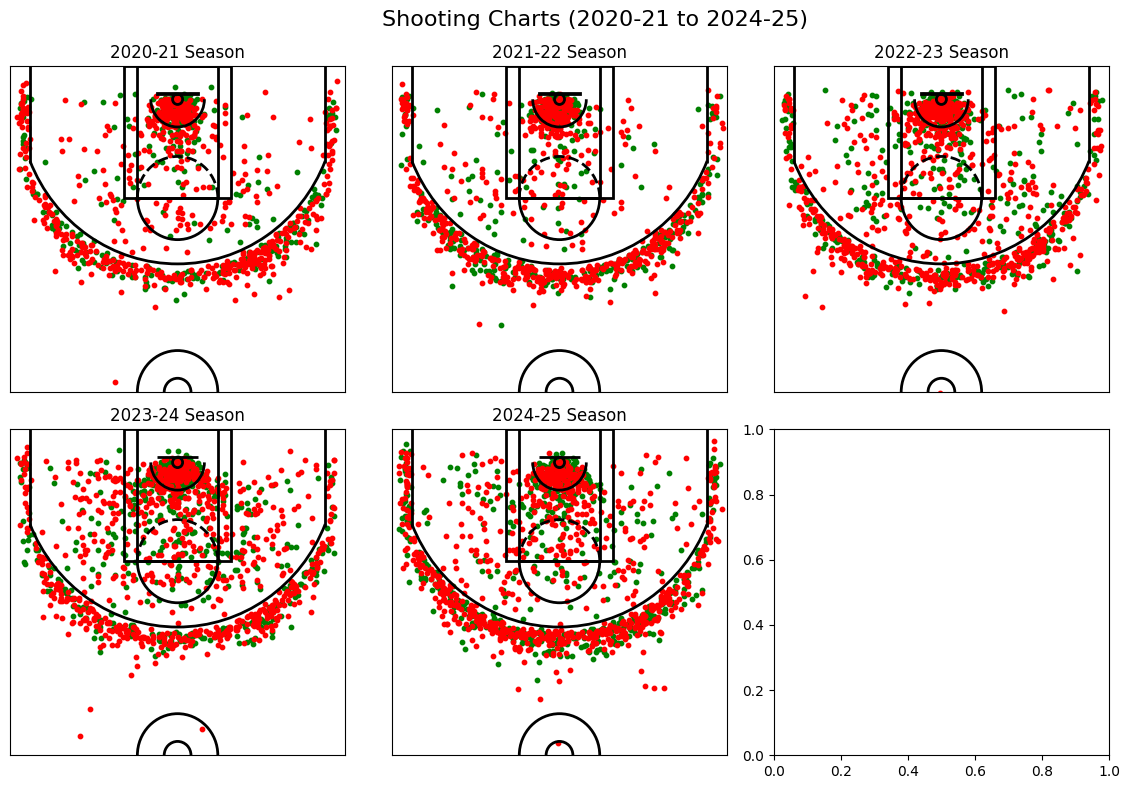

🏀 ANTHONY EDWARDS: SHOT CHART EXPLORATORY DATA ANALYSIS

📊 SECTION 4: SHOT DATA OVERVIEW
----------------------------------------
📈 Total games analyzed: 381
📅 Seasons covered: 5
🎯 Total field goal attempts: 7,167

📊 Shot attempts per season:
   2020-21: 1,211 FGA (41.7%), 520 3PA (32.9%)
   2021-22: 1,245 FGA (44.1%), 602 3PA (35.7%)
   2022-23: 1,541 FGA (45.9%), 578 3PA (36.9%)
   2023-24: 1,558 FGA (46.1%), 532 3PA (35.7%)
   2024-25: 1,612 FGA (44.7%), 811 3PA (39.5%)

🎯 SHOOTING EFFICIENCY BY ZONE:
----------------------------------------
            FGA  FG_PCT  FG3A  3P_PCT  FTA  FT_PCT   PTS
SEASON_ID                                               
2020-21    1211    41.7   520    32.9  272    77.6  1392
2021-22    1245    44.1   602    35.7  280    78.6  1533
2022-23    1541    45.9   578    36.9  422    75.6  1946
2023-24    1558    46.1   532    35.7  506    83.6  2049
2024-25    1612    44.7   811    39.5  496    83.7  2177

📈 SHOT DISTRIBUTION TRENDS:
---------------------

In [9]:
rows = 2  # Number of rows
cols = 3  # Number of columns (2 per row)

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, season in enumerate(seasons):
    # Get shot data for each season
    shot_chart = get_shot_chart(player_id=player_id, year=season)
    
    # Track shots made and missed
    made_shots = shot_chart[shot_chart['SHOT_MADE_FLAG'] == 1]
    missed_shots = shot_chart[shot_chart['SHOT_MADE_FLAG'] == 0]
    
    # Determine the row and column index for the subplot
    row = i // cols
    col = i % cols
    
    # Plot in the corresponding subplot
    ax = axes[row, col]
    ax.set_title(f'{season} Season')
    ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots', s=10)
    ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots', s=10)
    draw_court(ax=ax)  # Assuming draw_court function accepts an axis parameter
    ax.set_xlim(-250, 250)
    ax.set_ylim(422.5, -47.5)
    ax.axis('on')  # Turn off axis labels and ticks
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Add a main title
fig.suptitle('Shooting Charts (2020-21 to 2024-25)', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, .95, 1])
plt.show()

print("🏀 ANTHONY EDWARDS: SHOT CHART EXPLORATORY DATA ANALYSIS")
print("=" * 60)

print("\n📊 SECTION 4: SHOT DATA OVERVIEW")
print("-" * 40)

# Get Anthony Edwards shot data from combined seasons
anthony_shot_data = combined_seasons[combined_seasons['PLAYER_NAME'] == 'Anthony Edwards']

print(f"📈 Total games analyzed: {len(anthony_shot_data):,}")
print(f"📅 Seasons covered: {anthony_shot_data['SEASON_ID'].nunique()}")
print(f"🎯 Total field goal attempts: {anthony_shot_data['FGA'].sum():,.0f}")

# Shot attempts distribution by season
shots_by_season = anthony_shot_data.groupby('SEASON_ID').agg({
    'FGA': 'sum',
    'FGM': 'sum', 
    'FG3A': 'sum',
    'FG3M': 'sum'
})

print("\n📊 Shot attempts per season:")
for season in shots_by_season.index:
    fga = shots_by_season.loc[season, 'FGA']
    fgm = shots_by_season.loc[season, 'FGM']
    fg3a = shots_by_season.loc[season, 'FG3A']
    fg3m = shots_by_season.loc[season, 'FG3M']
    fg_pct = (fgm / fga * 100) if fga > 0 else 0
    fg3_pct = (fg3m / fg3a * 100) if fg3a > 0 else 0
    
    print(f"   {season}: {fga:,.0f} FGA ({fg_pct:.1f}%), {fg3a:,.0f} 3PA ({fg3_pct:.1f}%)")

# Shooting zones analysis
print("\n🎯 SHOOTING EFFICIENCY BY ZONE:")
print("-" * 40)

# Calculate shooting percentages
anthony_summary = anthony_shot_data.groupby('SEASON_ID').agg({
    'FGA': 'sum',
    'FGM': 'sum',
    'FG3A': 'sum', 
    'FG3M': 'sum',
    'FTA': 'sum',
    'FTM': 'sum',
    'PTS': 'sum'
}).round(1)

anthony_summary['FG_PCT'] = (anthony_summary['FGM'] / anthony_summary['FGA'] * 100).round(1)
anthony_summary['3P_PCT'] = (anthony_summary['FG3M'] / anthony_summary['FG3A'] * 100).round(1)
anthony_summary['FT_PCT'] = (anthony_summary['FTM'] / anthony_summary['FTA'] * 100).round(1)

print(anthony_summary[['FGA', 'FG_PCT', 'FG3A', '3P_PCT', 'FTA', 'FT_PCT', 'PTS']])

# Shot distribution visualization
print("\n📈 SHOT DISTRIBUTION TRENDS:")
print("-" * 40)

# Calculate 3-point rate by season
anthony_summary['3P_RATE'] = (anthony_summary['FG3A'] / anthony_summary['FGA'] * 100).round(1)

print("3-Point Attempt Rate by Season:")
for season in anthony_summary.index:
    rate = anthony_summary.loc[season, '3P_RATE']
    print(f"   {season}: {rate:.1f}% of shots from 3-point range")

# Career totals
career_totals = anthony_shot_data.agg({
    'FGA': 'sum',
    'FGM': 'sum',
    'FG3A': 'sum',
    'FG3M': 'sum', 
    'FTA': 'sum',
    'FTM': 'sum',
    'PTS': 'sum'
})

print(f"\n🏀 CAREER TOTALS:")
print("-" * 40)
print(f"Total Points: {career_totals['PTS']:,.0f}")
print(f"Total FGA: {career_totals['FGA']:,.0f} (Made: {career_totals['FGM']:,.0f}, {career_totals['FGM']/career_totals['FGA']*100:.1f}%)")
print(f"Total 3PA: {career_totals['FG3A']:,.0f} (Made: {career_totals['FG3M']:,.0f}, {career_totals['FG3M']/career_totals['FG3A']*100:.1f}%)")
print(f"Total FTA: {career_totals['FTA']:,.0f} (Made: {career_totals['FTM']:,.0f}, {career_totals['FTM']/career_totals['FTA']*100:.1f}%)")


## Spatial Shooting Analysis


🗺️ SECTION 5: ANTHONY EDWARDS SPATIAL SHOOTING ANALYSIS
----------------------------------------
✅ Loaded 2020-21: 1211 shots
✅ Loaded 2021-22: 1245 shots
✅ Loaded 2022-23: 1541 shots
✅ Loaded 2023-24: 1558 shots
✅ Loaded 2024-25: 1612 shots

📈 Total shots analyzed: 7,167
📅 Seasons covered: 5

📍 Anthony Edwards Shot Distribution by Zone:
                 Total_Attempts    FG%
ZONE                                  
Paint                      3360  0.541
Close Mid-Range            2482  0.363
Above Break 3               856  0.354
Long Mid-Range              385  0.369
Corner 3                     84  0.405


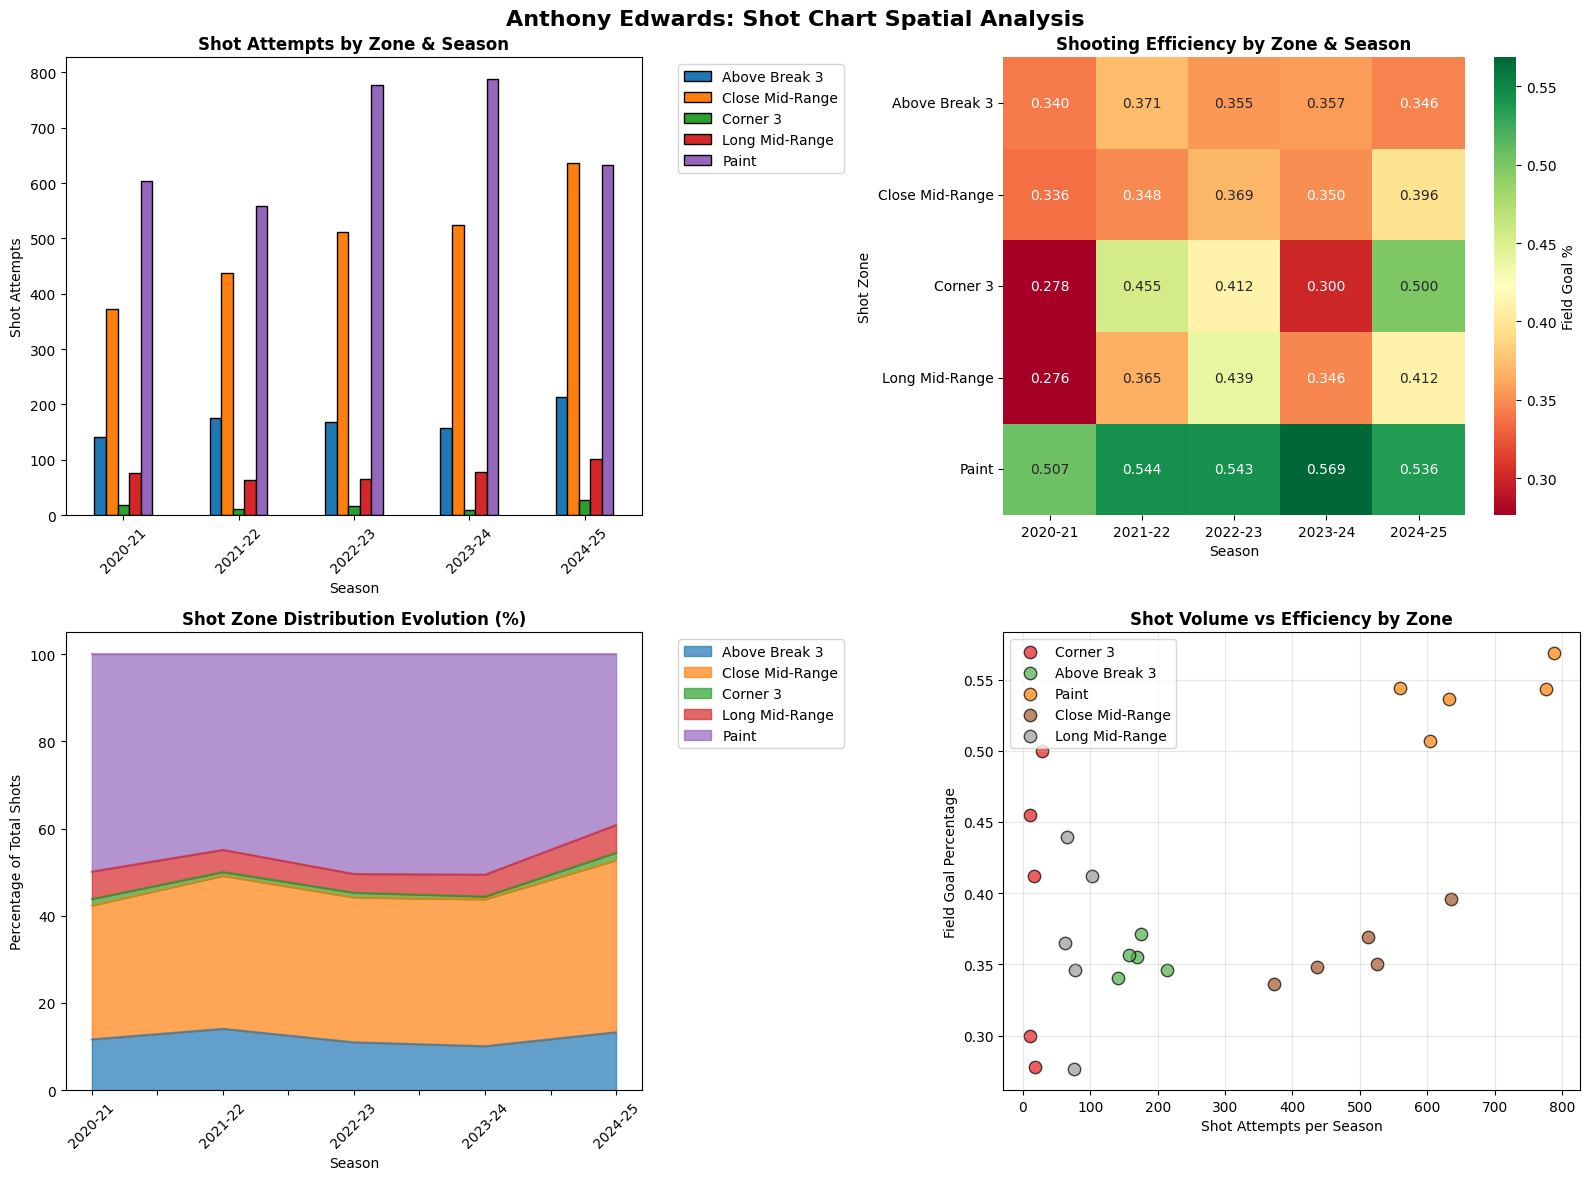


🎯 DETAILED ZONE ANALYSIS:
--------------------------------------------------
Above Break 3: 856 attempts (11.9%) at 0.4% FG
Close Mid-Range: 2,482 attempts (34.6%) at 0.4% FG
Corner 3: 84 attempts (1.2%) at 0.4% FG
Long Mid-Range: 385 attempts (5.4%) at 0.4% FG
Paint: 3,360 attempts (46.9%) at 0.5% FG


In [10]:
print(f"\n🗺️ SECTION 5: ANTHONY EDWARDS SPATIAL SHOOTING ANALYSIS")
print("-" * 40)

# Get Anthony Edwards player ID
anthony_player_id = players.find_players_by_full_name('anthony edwards')[0]['id']

# Collect shot chart data for all seasons
all_seasons_shot_data = []
anthony_seasons = ['2020-21', '2021-22', '2022-23', '2023-24', '2024-25']

for season in anthony_seasons:
    try:
        shot_chart = get_shot_chart(player_id=anthony_player_id, year=season)
        if not shot_chart.empty:
            shot_chart['SEASON'] = season
            all_seasons_shot_data.append(shot_chart)
            print(f"✅ Loaded {season}: {len(shot_chart)} shots")
        else:
            print(f"❌ No data for {season}")
    except Exception as e:
        print(f"❌ Could not retrieve shot data for {season}: {e}")

# Combine all seasons
if all_seasons_shot_data:
    all_seasons_data = pd.concat(all_seasons_shot_data, ignore_index=True)
    print(f"\n📈 Total shots analyzed: {len(all_seasons_data):,}")
    print(f"📅 Seasons covered: {all_seasons_data['SEASON'].nunique()}")
    
    # Zone-based analysis
    def categorize_shot_zone(row):
        x, y = row['LOC_X'], row['LOC_Y']
        
        # Paint area
        if abs(x) <= 80 and y <= 190:
            return 'Paint'
        # Close mid-range
        elif abs(x) <= 160 and y <= 280:
            return 'Close Mid-Range'
        # Long mid-range (inside 3pt line)
        elif np.sqrt(x**2 + y**2) <= 237.5:
            return 'Long Mid-Range'
        # Corner 3
        elif abs(x) >= 220 and y <= 92.5:
            return 'Corner 3'
        # Above the break 3
        else:
            return 'Above Break 3'

    all_seasons_data['ZONE'] = all_seasons_data.apply(categorize_shot_zone, axis=1)

    # Zone analysis by season
    zone_analysis = all_seasons_data.groupby(['SEASON', 'ZONE']).agg({
        'SHOT_MADE_FLAG': ['count', 'sum', 'mean']
    }).round(3)

    zone_analysis.columns = ['Attempts', 'Makes', 'FG%']
    zone_analysis = zone_analysis.reset_index()

    print("\n📍 Anthony Edwards Shot Distribution by Zone:")
    zone_summary = all_seasons_data.groupby('ZONE').agg({
        'SHOT_MADE_FLAG': ['count', 'mean']
    }).round(3)
    zone_summary.columns = ['Total_Attempts', 'FG%']
    print(zone_summary.sort_values('Total_Attempts', ascending=False))

    # Create zone visualization
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Anthony Edwards: Shot Chart Spatial Analysis', fontsize=16, fontweight='bold')

    # 3.1 Zone frequency by season
    ax1 = axes[0, 0]
    zone_counts = all_seasons_data.groupby(['SEASON', 'ZONE']).size().unstack(fill_value=0)
    zone_counts.plot(kind='bar', ax=ax1, edgecolor='black')
    ax1.set_title('Shot Attempts by Zone & Season', fontweight='bold')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Shot Attempts')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)

    # 3.2 Zone efficiency heatmap
    ax2 = axes[0, 1]
    zone_efficiency = all_seasons_data.groupby(['SEASON', 'ZONE'])['SHOT_MADE_FLAG'].mean().unstack(fill_value=0)
    sns.heatmap(zone_efficiency.T, annot=True, fmt='.3f', cmap='RdYlGn', ax=ax2, 
                cbar_kws={'label': 'Field Goal %'})
    ax2.set_title('Shooting Efficiency by Zone & Season', fontweight='bold')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Shot Zone')

    # 3.3 Shot distribution evolution
    ax3 = axes[1, 0]
    zone_pct = all_seasons_data.groupby(['SEASON', 'ZONE']).size().unstack(fill_value=0)
    zone_pct_norm = zone_pct.div(zone_pct.sum(axis=1), axis=0) * 100
    zone_pct_norm.plot(kind='area', ax=ax3, alpha=0.7)
    ax3.set_title('Shot Zone Distribution Evolution (%)', fontweight='bold')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('Percentage of Total Shots')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.tick_params(axis='x', rotation=45)

    # 3.4 Volume vs Efficiency by zone
    ax4 = axes[1, 1]
    zones = all_seasons_data['ZONE'].unique()
    colors = plt.cm.Set1(np.linspace(0, 1, len(zones)))
    
    for i, zone in enumerate(zones):
        zone_data = all_seasons_data[all_seasons_data['ZONE'] == zone]
        volumes = zone_data.groupby('SEASON').size()
        efficiency = zone_data.groupby('SEASON')['SHOT_MADE_FLAG'].mean()
        ax4.scatter(volumes, efficiency, label=zone, s=80, alpha=0.7, 
                   color=colors[i], edgecolors='black')

    ax4.set_title('Shot Volume vs Efficiency by Zone', fontweight='bold')
    ax4.set_xlabel('Shot Attempts per Season')
    ax4.set_ylabel('Field Goal Percentage')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print detailed zone analysis
    print(f"\n🎯 DETAILED ZONE ANALYSIS:")
    print("-" * 50)
    for zone in zone_summary.index:
        attempts = zone_summary.loc[zone, 'Total_Attempts']
        fg_pct = zone_summary.loc[zone, 'FG%']
        pct_of_total = (attempts / len(all_seasons_data) * 100)
        print(f"{zone}: {attempts:,} attempts ({pct_of_total:.1f}%) at {fg_pct:.1f}% FG")

else:
    print("❌ No shot chart data available. Using alternative shooting analysis...")
    # Fall back to the previous analysis using game-by-game data

## Points Prediction for 2025-26 season

In [13]:
data = pd.read_csv('nba_career_data.csv')
data = data.drop(columns=['Unnamed: 0', 'LEAGUE_ID', 'TEAM_ID'])
data

,PLAYER_ID,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME
0,1630173,2020-21,MIA,21.0,61,4,737,124,228,0.544,0,1,0.000,56,110,0.509,73,135,208,29,20,28,43,91,304,Precious Achiuwa
1,1630173,2021-22,TOR,22.0,73,28,1725,265,603,0.439,56,156,0.359,78,131,0.595,146,327,473,82,37,41,84,151,664,Precious Achiuwa
2,1630173,2022-23,TOR,23.0,55,12,1141,196,404,0.485,29,108,0.269,87,124,0.702,100,228,328,50,31,30,59,102,508,Precious Achiuwa
3,1630173,2023-24,TOR,24.0,25,0,437,78,170,0.459,13,47,0.277,24,42,0.571,50,86,136,44,16,12,29,40,193,Precious Achiuwa
4,1630173,2023-24,NYK,24.0,49,18,1187,157,299,0.525,13,50,0.260,45,70,0.643,141,210,351,53,30,56,54,103,372,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,1627747,2022-23,CLE,28.0,74,30,2237,320,742,0.431,127,324,0.392,130,180,0.722,53,229,282,287,72,24,116,170,897,Caris LeVert
1820,1627747,2023-24,CLE,29.0,68,10,1958,345,820,0.421,108,332,0.325,154,201,0.766,39,241,280,346,76,34,117,121,952,Caris LeVert
1821,1627747,2024-25,CLE,30.0,38,3,904,135,298,0.453,60,148,0.405,58,83,0.699,22,85,107,140,33,19,51,48,388,Caris LeVert
1822,1627747,2024-25,ATL,30.0,26,0,692,145,301,0.482,46,136,0.338,52,72,0.722,19,77,96,75,24,14,25,51,388,Caris LeVert


### FEATURES ILL BE USING

In [ ]:
# Create time-shifted dataset where features come from year t and target from year t+1
def create_time_shifted_dataset(data, target_col='POINTS_PER_GAME', feature_cols=None):
    data_sorted = data.sort_values(['PLAYER_NAME', 'SEASON_ID']).copy()
    
    season_order = {
        '2020-21': 1,
        '2021-22': 2, 
        '2022-23': 3,
        '2023-24': 4,
        '2024-25': 5
    }
    
    data_sorted['season_num'] = data_sorted['SEASON_ID'].map(season_order)
    
    shifted_data = []
    
    for player_name, player_data in data_sorted.groupby('PLAYER_NAME'):
        player_data = player_data.sort_values('season_num').reset_index(drop=True)
        
        for i in range(len(player_data) - 1):
            current_season = player_data.iloc[i].copy()
            next_season = player_data.iloc[i + 1]
            
            shifted_row = current_season.copy()
            
            shifted_row[target_col] = next_season[target_col]
            
            shifted_row['TARGET_SEASON_ID'] = next_season['SEASON_ID']
            
            shifted_data.append(shifted_row)
    
    # Convert to DataFrame
    shifted_df = pd.DataFrame(shifted_data).reset_index(drop=True)
    
    # Remove the season_num helper column
    shifted_df = shifted_df.drop('season_num', axis=1)
    
    return shifted_df

# Apply the time shifting
shifted_data = create_time_shifted_dataset(data, target_col='POINTS_PER_GAME')

train_data = shifted_data[shifted_data['TARGET_SEASON_ID'] != '2024-25'].copy()
test_data = shifted_data[shifted_data['TARGET_SEASON_ID'] == '2024-25'].copy()

Original dataset shape: (1824, 46)
Time-shifted dataset shape: (1549, 47)

Example: Features from 2022-23 predicting POINTS_PER_GAME from 2022-23

Train data shape: (1253, 47)
Test data shape: (296, 47)
Train data target seasons: ['2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']
Test data target seasons: ['2024-25']


In [31]:
import pandas as pd
import numpy as np

def create_enhanced_features(data, target_col='POINTS_PER_GAME'):
    """
    Create enhanced features for NBA player performance prediction including:
    - Current season stats as features
    - Rolling averages from past 2-3 seasons
    - Age progression (AGE+1 for next season)
    - Team change indicator
    """
    # First, create per-game stats if not already present
    data = data.copy()
    
    # Create per-game statistics
    data['POINTS_PER_GAME'] = (data['PTS'] / data['GP']).round(1)
    data['REBOUNDS_PER_GAME'] = (data['REB'] / data['GP']).round(1)
    data['ASSISTS_PER_GAME'] = (data['AST'] / data['GP']).round(1)
    data['STEALS_PER_GAME'] = (data['STL'] / data['GP']).round(1)
    data['BLOCKS_PER_GAME'] = (data['BLK'] / data['GP']).round(1)
    data['TURNOVERS_PER_GAME'] = (data['TOV'] / data['GP']).round(1)
    data['MINUTES_PER_GAME'] = (data['MIN'] / data['GP']).round(1)
    data['FGM_PER_GAME'] = (data['FGM'] / data['GP']).round(1)
    data['FGA_PER_GAME'] = (data['FGA'] / data['GP']).round(1)
    data['FG3M_PER_GAME'] = (data['FG3M'] / data['GP']).round(1)
    data['FG3A_PER_GAME'] = (data['FG3A'] / data['GP']).round(1)
    data['FTM_PER_GAME'] = (data['FTM'] / data['GP']).round(1)
    data['FTA_PER_GAME'] = (data['FTA'] / data['GP']).round(1)
    
    # Create efficiency metrics
    data['FG_PCT_CLEAN'] = data['FG_PCT'].fillna(0)
    data['FG3_PCT_CLEAN'] = data['FG3_PCT'].fillna(0)
    data['FT_PCT_CLEAN'] = data['FT_PCT'].fillna(0)
    data['TRUE_SHOOTING_PCT'] = (data['PTS'] / (2 * (data['FGA'] + 0.44 * data['FTA']))).fillna(0)
    data['EFFECTIVE_FG_PCT'] = ((data['FGM'] + 0.5 * data['FG3M']) / data['FGA']).fillna(0)
    
    # Season mapping for chronological order
    season_order = {
        '2020-21': 1, '2021-22': 2, '2022-23': 3, '2023-24': 4, '2024-25': 5
    }
    data['season_num'] = data['SEASON_ID'].map(season_order)
    
    # Sort data properly
    data_sorted = data.sort_values(['PLAYER_NAME', 'season_num']).copy()
    
    enhanced_data = []
    
    # Process each player separately
    for player_name, player_data in data_sorted.groupby('PLAYER_NAME'):
        player_data = player_data.sort_values('season_num').reset_index(drop=True)
        
        # For each season (except the last), create features from current year and target from next year
        for i in range(len(player_data) - 1):
            current_season = player_data.iloc[i].copy()
            next_season = player_data.iloc[i + 1]
            
            # Start with current season as base
            enhanced_row = current_season.copy()
            
            # 1. AGE PROGRESSION: Add next season's age as a feature
            enhanced_row['NEXT_SEASON_AGE'] = next_season['PLAYER_AGE']
            enhanced_row['AGE_PROGRESSION'] = next_season['PLAYER_AGE'] - current_season['PLAYER_AGE']
            
            # 2. TEAM CHANGE INDICATOR
            enhanced_row['TEAM_CHANGE'] = 1 if current_season['TEAM_ABBREVIATION'] != next_season['TEAM_ABBREVIATION'] else 0
            enhanced_row['PREV_TEAM'] = current_season['TEAM_ABBREVIATION']
            enhanced_row['NEXT_TEAM'] = next_season['TEAM_ABBREVIATION']
            
            # 3. ROLLING AVERAGES (2-3 seasons)
            # Get indices for rolling calculations
            start_idx = max(0, i - 2)  # Last 3 seasons including current
            rolling_data = player_data.iloc[start_idx:i+1]  # Up to and including current season
            
            # Rolling averages for key stats (2-season and 3-season)
            stats_for_rolling = [
                'POINTS_PER_GAME', 'REBOUNDS_PER_GAME', 'ASSISTS_PER_GAME', 
                'STEALS_PER_GAME', 'BLOCKS_PER_GAME', 'TURNOVERS_PER_GAME',
                'MINUTES_PER_GAME', 'FGM_PER_GAME', 'FGA_PER_GAME', 
                'FG_PCT_CLEAN', 'FG3_PCT_CLEAN', 'FT_PCT_CLEAN',
                'TRUE_SHOOTING_PCT', 'EFFECTIVE_FG_PCT', 'GP', 'GS'
            ]
            
            for stat in stats_for_rolling:
                if stat in rolling_data.columns:
                    # 2-season rolling average
                    if len(rolling_data) >= 2:
                        enhanced_row[f'{stat}_ROLL_2'] = rolling_data[stat].tail(2).mean()
                    else:
                        enhanced_row[f'{stat}_ROLL_2'] = rolling_data[stat].iloc[-1]
                    
                    # 3-season rolling average
                    if len(rolling_data) >= 3:
                        enhanced_row[f'{stat}_ROLL_3'] = rolling_data[stat].tail(3).mean()
                    else:
                        enhanced_row[f'{stat}_ROLL_3'] = rolling_data[stat].mean()
                    
                    # Trend calculation (slope of last 2-3 seasons)
                    if len(rolling_data) >= 2:
                        x = np.arange(len(rolling_data))
                        y = rolling_data[stat].values
                        if len(x) > 1 and not np.all(np.isnan(y)):
                            trend = np.polyfit(x, y, 1)[0]  # Slope of linear fit
                            enhanced_row[f'{stat}_TREND'] = trend
                        else:
                            enhanced_row[f'{stat}_TREND'] = 0
                    else:
                        enhanced_row[f'{stat}_TREND'] = 0
            
            # 4. CONSISTENCY METRICS
            if len(rolling_data) >= 2:
                # Standard deviation of performance (consistency indicator)
                enhanced_row['PPG_CONSISTENCY'] = rolling_data['POINTS_PER_GAME'].std()
                enhanced_row['MIN_CONSISTENCY'] = rolling_data['MINUTES_PER_GAME'].std()
                enhanced_row['FG_PCT_CONSISTENCY'] = rolling_data['FG_PCT_CLEAN'].std()
            else:
                enhanced_row['PPG_CONSISTENCY'] = 0
                enhanced_row['MIN_CONSISTENCY'] = 0
                enhanced_row['FG_PCT_CONSISTENCY'] = 0
            
            # 6. PERFORMANCE TRAJECTORY
            if len(rolling_data) >= 2:
                # Year-over-year change
                enhanced_row['PPG_YOY_CHANGE'] = current_season['POINTS_PER_GAME'] - rolling_data['POINTS_PER_GAME'].iloc[-2]
                enhanced_row['MIN_YOY_CHANGE'] = current_season['MINUTES_PER_GAME'] - rolling_data['MINUTES_PER_GAME'].iloc[-2]
            else:
                enhanced_row['PPG_YOY_CHANGE'] = 0
                enhanced_row['MIN_YOY_CHANGE'] = 0
            
            # 7. ROLE INDICATORS
            enhanced_row['STARTER_RATE'] = current_season['GS'] / current_season['GP'] if current_season['GP'] > 0 else 0
            enhanced_row['HIGH_USAGE'] = 1 if current_season['MINUTES_PER_GAME'] > 30 else 0
            enhanced_row['BENCH_PLAYER'] = 1 if enhanced_row['STARTER_RATE'] < 0.5 else 0
            
            # 8. TARGET VARIABLE (from next season)
            enhanced_row[target_col] = next_season[target_col]
            enhanced_row['TARGET_SEASON_ID'] = next_season['SEASON_ID']
            
            enhanced_data.append(enhanced_row)
    
    # Convert to DataFrame
    enhanced_df = pd.DataFrame(enhanced_data).reset_index(drop=True)
    
    # Clean up helper columns
    enhanced_df = enhanced_df.drop(['season_num'], axis=1)
    
    return enhanced_df

# Apply the enhanced feature engineering
enhanced_data = create_enhanced_features(data, target_col='POINTS_PER_GAME')

# Show the new feature categories
new_features = [col for col in enhanced_data.columns if col not in data.columns]

# Categorize features
age_features = [f for f in new_features if 'AGE' in f]
team_features = [f for f in new_features if 'TEAM' in f]
rolling_features = [f for f in new_features if 'ROLL' in f]
trend_features = [f for f in new_features if 'TREND' in f]
consistency_features = [f for f in new_features if 'CONSISTENCY' in f]
trajectory_features = [f for f in new_features if 'YOY' in f]
role_features = [f for f in new_features if any(x in f for x in ['STARTER', 'USAGE', 'BENCH'])]

# Update train/test split with enhanced features
train_data = enhanced_data[enhanced_data['TARGET_SEASON_ID'] != '2024-25'].copy()
test_data = enhanced_data[enhanced_data['TARGET_SEASON_ID'] == '2024-25'].copy()

print(f"\nEnhanced train data shape: {train_data.shape}")
print(f"Enhanced test data shape: {test_data.shape}")

# Define comprehensive feature set for modeling
BASE_FEATURES = [
    'PLAYER_AGE', 'GP', 'GS', 'MINUTES_PER_GAME',
    'FGM_PER_GAME', 'FGA_PER_GAME', 'FG_PCT_CLEAN',
    'FG3M_PER_GAME', 'FG3A_PER_GAME', 'FG3_PCT_CLEAN',
    'FTM_PER_GAME', 'FTA_PER_GAME', 'FT_PCT_CLEAN',
    'REBOUNDS_PER_GAME', 'ASSISTS_PER_GAME', 'STEALS_PER_GAME',
    'BLOCKS_PER_GAME', 'TURNOVERS_PER_GAME'
]

ENHANCED_FEATURES = BASE_FEATURES + [
    # Age progression
    'NEXT_SEASON_AGE', 'AGE_PROGRESSION',
    
    # Team change
    'TEAM_CHANGE',
    
    # Rolling averages (key stats)
    'POINTS_PER_GAME_ROLL_2', 'POINTS_PER_GAME_ROLL_3',
    'MINUTES_PER_GAME_ROLL_2', 'MINUTES_PER_GAME_ROLL_3',
    'FG_PCT_CLEAN_ROLL_2', 'FG_PCT_CLEAN_ROLL_3',
    'ASSISTS_PER_GAME_ROLL_2', 'ASSISTS_PER_GAME_ROLL_3',
    
    # Trends
    'POINTS_PER_GAME_TREND', 'MINUTES_PER_GAME_TREND', 'FG_PCT_CLEAN_TREND',
    
    # Consistency
    'PPG_CONSISTENCY', 'MIN_CONSISTENCY', 'FG_PCT_CONSISTENCY',
    
    # Trajectory
    'PPG_YOY_CHANGE', 'MIN_YOY_CHANGE',
    
    # Role
    'STARTER_RATE', 'HIGH_USAGE', 'BENCH_PLAYER'
]

enhanced_data.head()


Enhanced train data shape: (1253, 120)
Enhanced test data shape: (296, 120)


,PLAYER_ID,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLAYER_NAME,POINTS_PER_GAME,POINTS_PER_36_MINUTES,FIELD_GOALS_MADE_PER_GAME,FIELD_GOALS_ATTEMPTS_PER_GAME,THREE_POINT_MADE_PER_GAME,THREE_POINT_ATTEMPTS_PER_GAME,FREE_THROWS_MADE_PER_GAME,FREE_THROWS_ATTEMPTS_PER_GAME,REBOUNDS_PER_GAME,OFFENSIVE_REBOUNDS_PER_GAME,DEFENSIVE_REBOUNDS_PER_GAME,ASSIST_PER_GAME,STEALS_PER_GAME,BLOCKS_PER_GAME,TURNOVERS_PER_GAME,FOULS_PER_GAME,MINUTES_PER_GAME,FG%,3P%,FT%,ASSISTS_PER_GAME,FGM_PER_GAME,FGA_PER_GAME,FG3M_PER_GAME,FG3A_PER_GAME,FTM_PER_GAME,FTA_PER_GAME,FG_PCT_CLEAN,FG3_PCT_CLEAN,FT_PCT_CLEAN,TRUE_SHOOTING_PCT,EFFECTIVE_FG_PCT,NEXT_SEASON_AGE,AGE_PROGRESSION,TEAM_CHANGE,PREV_TEAM,NEXT_TEAM,POINTS_PER_GAME_ROLL_2,POINTS_PER_GAME_ROLL_3,POINTS_PER_GAME_TREND,REBOUNDS_PER_GAME_ROLL_2,REBOUNDS_PER_GAME_ROLL_3,REBOUNDS_PER_GAME_TREND,ASSISTS_PER_GAME_ROLL_2,ASSISTS_PER_GAME_ROLL_3,ASSISTS_PER_GAME_TREND,STEALS_PER_GAME_ROLL_2,STEALS_PER_GAME_ROLL_3,STEALS_PER_GAME_TREND,BLOCKS_PER_GAME_ROLL_2,BLOCKS_PER_GAME_ROLL_3,BLOCKS_PER_GAME_TREND,TURNOVERS_PER_GAME_ROLL_2,TURNOVERS_PER_GAME_ROLL_3,TURNOVERS_PER_GAME_TREND,MINUTES_PER_GAME_ROLL_2,MINUTES_PER_GAME_ROLL_3,MINUTES_PER_GAME_TREND,FGM_PER_GAME_ROLL_2,FGM_PER_GAME_ROLL_3,FGM_PER_GAME_TREND,FGA_PER_GAME_ROLL_2,FGA_PER_GAME_ROLL_3,FGA_PER_GAME_TREND,FG_PCT_CLEAN_ROLL_2,FG_PCT_CLEAN_ROLL_3,FG_PCT_CLEAN_TREND,FG3_PCT_CLEAN_ROLL_2,FG3_PCT_CLEAN_ROLL_3,FG3_PCT_CLEAN_TREND,FT_PCT_CLEAN_ROLL_2,FT_PCT_CLEAN_ROLL_3,FT_PCT_CLEAN_TREND,TRUE_SHOOTING_PCT_ROLL_2,TRUE_SHOOTING_PCT_ROLL_3,TRUE_SHOOTING_PCT_TREND,EFFECTIVE_FG_PCT_ROLL_2,EFFECTIVE_FG_PCT_ROLL_3,EFFECTIVE_FG_PCT_TREND,GP_ROLL_2,GP_ROLL_3,GP_TREND,GS_ROLL_2,GS_ROLL_3,GS_TREND,PPG_CONSISTENCY,MIN_CONSISTENCY,FG_PCT_CONSISTENCY,PPG_YOY_CHANGE,MIN_YOY_CHANGE,STARTER_RATE,HIGH_USAGE,BENCH_PLAYER,TARGET_SEASON_ID
0,1630639,2022-23,MIN,22.0,1,0,2,1,1,1.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,0,1,2,A.J. Lawson,3.9,36.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,100.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.000,0.000,0.000,1.000000,1.000000,22.0,0.0,1,MIN,DAL,2.00,2.00,0.00,1.0,1.000000,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,2.0,2.0,0.0,1.00,1.000000,0.00,1.00,1.000000,0.00,1.000,1.000000,0.000,0.000,0.000000,0.00,0.000,0.000000,0.000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,1,2022-23
1,1630639,2022-23,DAL,22.0,14,0,107,21,43,0.488,10,25,0.400,2,8,0.250,6,14,20,2,2,0,3,10,54,A.J. Lawson,3.7,18.2,1.5,3.1,0.7,1.8,0.1,0.6,1.4,0.4,1.0,0.1,0.1,0.0,0.2,0.7,7.6,48.8,40.0,25.0,0.1,1.5,3.1,0.7,1.8,0.1,0.6,0.488,0.400,0.250,0.580396,0.604651,22.0,0.0,1,DAL,TOT,2.95,2.95,1.90,1.2,1.200000,0.4,0.05,0.050000,0.10,0.05,0.050000,0.10,0.00,0.000000,0.00,0.10,0.100000,0.20,4.8,4.8,5.6,1.25,1.250000,0.50,2.05,2.050000,2.10,0.744,0.744000,-0.512,0.200,0.200000,0.40,0.125,0.125000,0.250,0.790198,0.790198,-0.419604,0.802326,0.802326,-0.395349,7.5,7.500000,13.0,0.0,0.0,0.0,1.343503,3.959798,0.362039,1.9,5.6,0.000000,0,1,2022-23
2,1630639,2022-23,TOT,22.0,15,0,108,22,44,0.500,10,25,0.400,2,8,0.250,6,15,21,2,2,0,3,11,56,A.J. Lawson,3.2,18.7,1.5,2.9,0.7,1.7,0.1,0.5,1.4,0.4,1.0,0.1,0.1,0.0,0.2,0.7,7.2,50.0,40.0,25.0,0.1,1.5,2.9,0.7,1.7,0.1,0.5,0.500,0.400,0.250,0.589226,0.613636,23.0,1.0,1,TOT,DAL,3.80,3.20,0.85,1.4,1.266667,0.2,0.10,0.066667,0.05,0.10,0.066667,0.05,0.00,0.000000,-0.00,0.20,0.133333,0.10,7.4,5.6,2.6,1.50,1.333333,0.25,3.00,2.333333,0.95,0.494,0.662667,-0.250,0.400,0.266667,0.20,0.250,0.166667,0.125,0.584811,0.723207,-0.205387,0.609144,0.739429,-0.193182,14.5,10.000000,7.0,0.0,0.0,-0.0,1.044031,3.124100,0.292201,-0.2,-0.4,0.000000,0,1,2023-24
3,1630639,2023-24,DAL,23.0,42,0,311,54,121,0.446,13,50,0.260,15,23,0.652,14,36,50,20,10,3,14,22,136,A.J. Lawson,9.1,15.7,1.3,2.9,0.3,1.2,0.4,0.5,1.2,0.3,0.9,0.5,0.2,0.1,0.3,0.5,7.4,44.6,26.0,6

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

X_train = train_data[ENHANCED_FEATURES]
y_train = train_data['POINTS_PER_GAME']

X_test = test_data[ENHANCED_FEATURES]
y_test = test_data['POINTS_PER_GAME']

model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print(f"MAE: {mean_squared_error(y_test, y_pred)}")
# print(f"R2: {r2_score(y_test, y_pred)}")

#anthony edwards prediction
anthony_edwards = test_data[test_data['PLAYER_NAME'] == 'Anthony Edwards']
anthony_edwards_pred = model.predict(anthony_edwards[ENHANCED_FEATURES])
print(f"Anthony Edwards 2025-26 Points Prediction: {anthony_edwards_pred[0]:.1f}")

Anthony Edwards 2025-26 Points Prediction: 25.5
